# Bernoulli試行, 二項分布, 幾何分布, 負の二項分布

* 黒木玄
* 2020-04-09
$
\newcommand\op{\operatorname}
\newcommand\R{{\mathbb R}}
\newcommand\var{\op{var}}
\newcommand\std{\op{std}}
$

このノートでは[Julia言語](https://julialang.org/)を使用している: 

* [Julia言語のインストールの仕方の一例](https://nbviewer.org/github/genkuroki/msfd28/blob/master/install.ipynb)

自明な誤りを見つけたら, 自分で訂正して読んで欲しい.  大文字と小文字の混同や書き直しが不完全な場合や符号のミスは非常によくある.

このノートの内容よりもさらに詳しいノートを自分で作ると勉強になるだろう.  膨大な時間を取られることになるが, このノートの内容に関係することで飯を食っていく可能性がある人にはそのためにかけた時間は無駄にならないと思われる.

<h1>目次<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#WolframAlphaの使い方" data-toc-modified-id="WolframAlphaの使い方-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>WolframAlphaの使い方</a></span></li><li><span><a href="#一様乱数の生成の繰り返し" data-toc-modified-id="一様乱数の生成の繰り返し-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>一様乱数の生成の繰り返し</a></span></li><li><span><a href="#Bernoulli試行" data-toc-modified-id="Bernoulli試行-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Bernoulli試行</a></span></li><li><span><a href="#離散分布" data-toc-modified-id="離散分布-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>離散分布</a></span><ul class="toc-item"><li><span><a href="#離散分布と確率質量函数" data-toc-modified-id="離散分布と確率質量函数-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>離散分布と確率質量函数</a></span></li><li><span><a href="#離散確率変数" data-toc-modified-id="離散確率変数-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>離散確率変数</a></span></li><li><span><a href="#離散確率変数の期待値" data-toc-modified-id="離散確率変数の期待値-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>離散確率変数の期待値</a></span></li><li><span><a href="#離散確率変数の期待値を取る操作の基本性質" data-toc-modified-id="離散確率変数の期待値を取る操作の基本性質-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>離散確率変数の期待値を取る操作の基本性質</a></span></li><li><span><a href="#離散確率変数に関する確率" data-toc-modified-id="離散確率変数に関する確率-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>離散確率変数に関する確率</a></span></li><li><span><a href="#離散確率変数の分散と標準偏差" data-toc-modified-id="離散確率変数の分散と標準偏差-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>離散確率変数の分散と標準偏差</a></span></li><li><span><a href="#問題:-期待値と分散の特徴付け" data-toc-modified-id="問題:-期待値と分散の特徴付け-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>問題: 期待値と分散の特徴付け</a></span></li><li><span><a href="#カテゴリカル分布" data-toc-modified-id="カテゴリカル分布-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>カテゴリカル分布</a></span></li><li><span><a href="#問題:-ルーレットの例の賞金の期待値と分散" data-toc-modified-id="問題:-ルーレットの例の賞金の期待値と分散-4.9"><span class="toc-item-num">4.9&nbsp;&nbsp;</span>問題: ルーレットの例の賞金の期待値と分散</a></span></li><li><span><a href="#Bernoulli分布" data-toc-modified-id="Bernoulli分布-4.10"><span class="toc-item-num">4.10&nbsp;&nbsp;</span>Bernoulli分布</a></span></li><li><span><a href="#問題:-Bernoulli分布の期待値と分散" data-toc-modified-id="問題:-Bernoulli分布の期待値と分散-4.11"><span class="toc-item-num">4.11&nbsp;&nbsp;</span>問題: Bernoulli分布の期待値と分散</a></span></li><li><span><a href="#オッズの定義と例" data-toc-modified-id="オッズの定義と例-4.12"><span class="toc-item-num">4.12&nbsp;&nbsp;</span>オッズの定義と例</a></span></li><li><span><a href="#オッズとロジットおよびロジスティック変換" data-toc-modified-id="オッズとロジットおよびロジスティック変換-4.13"><span class="toc-item-num">4.13&nbsp;&nbsp;</span>オッズとロジットおよびロジスティック変換</a></span></li><li><span><a href="#Bernoulli試行の確率分布" data-toc-modified-id="Bernoulli試行の確率分布-4.14"><span class="toc-item-num">4.14&nbsp;&nbsp;</span>Bernoulli試行の確率分布</a></span></li><li><span><a href="#問題:-n=3,-p=0.3-の場合のBernoulli試行の確率分布" data-toc-modified-id="問題:-n=3,-p=0.3-の場合のBernoulli試行の確率分布-4.15"><span class="toc-item-num">4.15&nbsp;&nbsp;</span>問題: n=3, p=0.3 の場合のBernoulli試行の確率分布</a></span></li><li><span><a href="#Bernoulli試行から応用上基本的かつ重要な確率分布が大量に得られること" data-toc-modified-id="Bernoulli試行から応用上基本的かつ重要な確率分布が大量に得られること-4.16"><span class="toc-item-num">4.16&nbsp;&nbsp;</span>Bernoulli試行から応用上基本的かつ重要な確率分布が大量に得られること</a></span></li><li><span><a href="#二項定理" data-toc-modified-id="二項定理-4.17"><span class="toc-item-num">4.17&nbsp;&nbsp;</span>二項定理</a></span></li><li><span><a href="#二項分布" data-toc-modified-id="二項分布-4.18"><span class="toc-item-num">4.18&nbsp;&nbsp;</span>二項分布</a></span></li><li><span><a href="#問題:-二項分布の期待値と分散" data-toc-modified-id="問題:-二項分布の期待値と分散-4.19"><span class="toc-item-num">4.19&nbsp;&nbsp;</span>問題: 二項分布の期待値と分散</a></span></li><li><span><a href="#問題:-当たりが30%の確率で出るくじを100回引いた場合" data-toc-modified-id="問題:-当たりが30%の確率で出るくじを100回引いた場合-4.20"><span class="toc-item-num">4.20&nbsp;&nbsp;</span>問題: 当たりが30%の確率で出るくじを100回引いた場合</a></span></li><li><span><a href="#幾何分布" data-toc-modified-id="幾何分布-4.21"><span class="toc-item-num">4.21&nbsp;&nbsp;</span>幾何分布</a></span></li><li><span><a href="#幾何分布の期待値と分散" data-toc-modified-id="幾何分布の期待値と分散-4.22"><span class="toc-item-num">4.22&nbsp;&nbsp;</span>幾何分布の期待値と分散</a></span></li><li><span><a href="#問題:-当たりが出る確率が1%のガチャを当たりが出るまで回す場合" data-toc-modified-id="問題:-当たりが出る確率が1%のガチャを当たりが出るまで回す場合-4.23"><span class="toc-item-num">4.23&nbsp;&nbsp;</span>問題: 当たりが出る確率が1%のガチャを当たりが出るまで回す場合</a></span></li><li><span><a href="#負の二項展開" data-toc-modified-id="負の二項展開-4.24"><span class="toc-item-num">4.24&nbsp;&nbsp;</span>負の二項展開</a></span></li><li><span><a href="#負の二項分布" data-toc-modified-id="負の二項分布-4.25"><span class="toc-item-num">4.25&nbsp;&nbsp;</span>負の二項分布</a></span></li><li><span><a href="#負の二項分布の期待値と分散" data-toc-modified-id="負の二項分布の期待値と分散-4.26"><span class="toc-item-num">4.26&nbsp;&nbsp;</span>負の二項分布の期待値と分散</a></span></li><li><span><a href="#問題:-当たりが出る確率が5%のガチャを当たりが5回出るまで回す場合" data-toc-modified-id="問題:-当たりが出る確率が5%のガチャを当たりが5回出るまで回す場合-4.27"><span class="toc-item-num">4.27&nbsp;&nbsp;</span>問題: 当たりが出る確率が5%のガチャを当たりが5回出るまで回す場合</a></span></li></ul></li><li><span><a href="#連続分布" data-toc-modified-id="連続分布-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>連続分布</a></span><ul class="toc-item"><li><span><a href="#連続分布と確率密度函数" data-toc-modified-id="連続分布と確率密度函数-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>連続分布と確率密度函数</a></span></li><li><span><a href="#一様分布" data-toc-modified-id="一様分布-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span><em>一様分布</em></a></span></li><li><span><a href="#正規分布" data-toc-modified-id="正規分布-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>正規分布</a></span></li><li><span><a href="#連続確率変数" data-toc-modified-id="連続確率変数-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>連続確率変数</a></span></li><li><span><a href="#連続確率変数に関する確率とその期待値" data-toc-modified-id="連続確率変数に関する確率とその期待値-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>連続確率変数に関する確率とその期待値</a></span></li><li><span><a href="#確率変数の確率密度函数" data-toc-modified-id="確率変数の確率密度函数-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>確率変数の確率密度函数</a></span></li><li><span><a href="#確率変数の確率質量函数" data-toc-modified-id="確率変数の確率質量函数-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>確率変数の確率質量函数</a></span></li><li><span><a href="#連続分布における確率変数の期待値を取る操作の基本性質" data-toc-modified-id="連続分布における確率変数の期待値を取る操作の基本性質-5.8"><span class="toc-item-num">5.8&nbsp;&nbsp;</span>連続分布における確率変数の期待値を取る操作の基本性質</a></span></li><li><span><a href="#連続分布における確率変数の分散" data-toc-modified-id="連続分布における確率変数の分散-5.9"><span class="toc-item-num">5.9&nbsp;&nbsp;</span>連続分布における確率変数の分散</a></span></li><li><span><a href="#確率変数の一次函数の期待値と分散" data-toc-modified-id="確率変数の一次函数の期待値と分散-5.10"><span class="toc-item-num">5.10&nbsp;&nbsp;</span>確率変数の一次函数の期待値と分散</a></span></li><li><span><a href="#確率変数の累積分布函数" data-toc-modified-id="確率変数の累積分布函数-5.11"><span class="toc-item-num">5.11&nbsp;&nbsp;</span>確率変数の累積分布函数</a></span></li><li><span><a href="#分位点函数-(quantile-function)" data-toc-modified-id="分位点函数-(quantile-function)-5.12"><span class="toc-item-num">5.12&nbsp;&nbsp;</span>分位点函数 (quantile function)</a></span></li><li><span><a href="#カテゴリカル分布の累積分布函数" data-toc-modified-id="カテゴリカル分布の累積分布函数-5.13"><span class="toc-item-num">5.13&nbsp;&nbsp;</span>カテゴリカル分布の累積分布函数</a></span></li><li><span><a href="#一様分布の累積分布函数" data-toc-modified-id="一様分布の累積分布函数-5.14"><span class="toc-item-num">5.14&nbsp;&nbsp;</span>一様分布の累積分布函数</a></span></li><li><span><a href="#標準正規分布の累積分布函数" data-toc-modified-id="標準正規分布の累積分布函数-5.15"><span class="toc-item-num">5.15&nbsp;&nbsp;</span>標準正規分布の累積分布函数</a></span></li><li><span><a href="#一様分布の期待値と分散" data-toc-modified-id="一様分布の期待値と分散-5.16"><span class="toc-item-num">5.16&nbsp;&nbsp;</span>一様分布の期待値と分散</a></span></li><li><span><a href="#標準正規分布の期待値と分散" data-toc-modified-id="標準正規分布の期待値と分散-5.17"><span class="toc-item-num">5.17&nbsp;&nbsp;</span>標準正規分布の期待値と分散</a></span></li></ul></li><li><span><a href="#一様乱数の生成の繰り返しの分布" data-toc-modified-id="一様乱数の生成の繰り返しの分布-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>一様乱数の生成の繰り返しの分布</a></span></li></ul></div>

## WolframAlphaの使い方

[WolframAlpha](https://www.wolframalpha.com/)を利用すれば以下のような計算が可能である.  例えば,

$$
(10000 - 2020)^2 \cdot 0.1 + (3000 - 2020)^2 \cdot 0.2 + (1000 - 2020)^2 \cdot 0.3 + (300 - 2020)^2 \cdot 0.4
$$

は次のように入力すれば計算できる:

* [(10000 - 2020)^2 0.1 + (3000 - 2020)^2 0.2 + (1000 - 2020)^2 0.3 + (300 - 2020)^2 0.4](https://www.wolframalpha.com/input?i=%2810000+-+2020%29%5E2+0.1+%2B+%283000+-+2020%29%5E2+0.2+%2B+%281000+-+2020%29%5E2+0.3+%2B+%28300+-+2020%29%5E2+0.4)

二項係数を含む式

$$
\sum_{k=5}^{300} \binom{300}{k} 0.01^k (1 - 0.01)^{300-k}
$$

は次のように入力すれば計算できる:

* [sum_{k=5}^{300} binom(300, k) 0.01^k (1 - 0.01)^(300-k)](https://www.wolframalpha.com/input?i=sum_%7Bk%3D5%7D%5E%7B300%7D+binom%28300%2C+k%29+0.01%5Ek+%281+-+0.01%29%5E%28300-k%29)

これは当たりが出る確率が1%のガチャを300回まわしたときに幸運にも当たりが5回以上出る確率になっている.

積分

$$
2\int_{1.96}^\infty \frac{\exp(-x^2/2)}{\sqrt{2\pi}}\,dx
$$

は次のように入力すれば計算できる:

* [2 int_{1.96}^{infty} exp(-x^2/2)/sqrt(2π) dx](https://www.wolframalpha.com/input?i=2+int_%7B1.96%7D%5E%7Binfty%7D+exp%28-x%5E2%2F2%29%2Fsqrt%282%CF%80%29+dx)

これはほぼ $5\% = 0.05$ になる.

統計学での練習問題を解くためにはこの手の計算を何らかの手段でできるようになっておく必要がある.

In [1]:
ENV["LINES"], ENV["COLUMNS"] = 100, 100
using Distributions
using StatsPlots
default(fmt = :png, titlefontsize = 10, size = (400, 250))
using Random
Random.seed!(4649373)
using StatsBase
using QuadGK
using SymPy
using SpecialFunctions

## 一様乱数の生成の繰り返し

__確率変数__ の理解に向けて, コンピュータでの `rand()` 函数について説明する.

0以上1未満の区間上の一様分布の(擬似)乱数(以下ではこれを __一様乱数__ と短く呼ぶことにする)を10個生成すると以下のようになる.

In [2]:
[rand() for _ in 1:10]

10-element Vector{Float64}:
 0.5105030210947423
 0.13229885279256504
 0.05873542170272006
 0.742812017444488
 0.8417141593154808
 0.44238748406950934
 0.5002487759410339
 0.7049642022880609
 0.6687158029467306
 0.7672724745322447

コンピュータでの `rand()` は __値がランダムに決まる量という意味での確率変数__ のわかりやすい例になっていると思える.　

上と同じ結果を与えるコードは次のようにもっとシンプルに書ける.

In [3]:
rand(10)

10-element Vector{Float64}:
 0.7702439301833676
 0.6263555234233755
 0.4983977148383013
 0.6011722501239075
 0.18013689329541094
 0.37632266071643605
 0.13414398433355734
 0.9652043335626921
 0.7352525630207614
 0.23381276022709152

## Bernoulli試行

確率 $p$ で $1$ を, 確率 $1-p$ で $0$ をランダムに毎回独立に生成することの繰り返しを __Bernoulli試行__ (ベルヌーイ試行, ベルヌイ試行)と呼ぶ.

Bernoulli試行は上で説明した `rand()` の繰り返しに似ており, 乱数の値が $1$ と $0$ しかない場合の乱数列生成だとみなされる.

In [4]:
@show rand(Bernoulli(0.3), 20);

rand(Bernoulli(0.3), 20) = Bool[0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1]


これは $1$ が生成される確率が $p = 0.3$ で試行回数が $n = 20$ のBernoulli試行の例であり, この場合には生成された $1$ の個数の方が $0$ の個数より少なくなっている.

乱数の出目が大幅に偏っていれば $1$ の個数の方が多くなることもありえる.  $1$ が生成される確率が $p = 0.3$ で試行回数が $n = 20$ のBernoulli試行で生成された $1$ の個数が $10$ より大きくなる確率は約 $1.7\%$ になる.

In [5]:
ccdf(Binomial(20, 0.3), 10)

0.017144816431258425

0以上1未満の乱数生成を繰り返して, 乱数の値が $p$ 未満(以下でもよい)ならば $1$ を生成し, $p$ 以上(より大きいでもよい)のとき $0$ を生成することにしてもBernoulli試行が得られる.

In [6]:
T = rand(20)

20-element Vector{Float64}:
 0.7086835170539888
 0.31298780774587776
 0.4432299124211534
 0.6380100590067396
 0.7457553759007464
 0.004247998860855362
 0.4282692167397828
 0.2591080281694401
 0.6056891396222264
 0.47188315130394587
 0.2359750577106341
 0.3658417371594386
 0.4169159761488047
 0.2234702295437706
 0.2267949185649013
 0.10540529605741011
 0.5401955636162634
 0.36204558651514074
 0.9332297268604005
 0.10099627820594892

以下の計算では $T$ の成分が $p = 0.3$ 未満のときに $1$ に, それ以外のときに $0$ に変換している.  これによって, 一様乱数列からBernoulli試行が得られる.

In [7]:
X = [t < 0.3 ? 1 : 0 for t in T]
@show X;

X = [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1]


Bernoulli試行に限らず, 何らかの確率分布に従う乱数の生成の独立試行は, 0以上1未満の一様乱数の生成を経由して作ることができる.  その意味でコンピュータでのプログラミングでおなじみの `rand()` 函数は基本的である.

毎回同確率で当たりが出るくじを繰り返し引くことは, 当たりのときに $1$, 外れのときに0とすれば, Bernoulli試行モデルで記述できることの例になっている. 

In [8]:
[x == 1 ? "当たり" : "外れ" for x in X]

20-element Vector{String}:
 "外れ"
 "外れ"
 "外れ"
 "外れ"
 "外れ"
 "当たり"
 "外れ"
 "当たり"
 "外れ"
 "外れ"
 "当たり"
 "外れ"
 "外れ"
 "当たり"
 "当たり"
 "当たり"
 "外れ"
 "外れ"
 "外れ"
 "当たり"

ビジネス分野では, 「広告を見てくれる」「リンクをクリックしてくれる」「商品を購入してくれる」などが「当たり」の例として扱われたりする.

現実の統計分析でBernoulli試行モデルを使う場合には, 「当たり」がよいことばかりとは限らない.  たとえば, 「病気になる」「死ぬ」「事故が起きる」「機器が壊れる」などもBernoulli試行モデルで扱われる場合がある. 

現実への応用において, Bernoulli試行モデルはある処置によって生じる「当たり」が出る確率の変化を推定するために使われることが多い.

例えば, 「薬を飲むと病気になる確率が減るか？」とか「ウェブサイトの構成を変えると商品を買ってもらえる確率が上がるか？」などが問題になる.

しかし, Bernoulli試行モデルにおける「すべての場合に同じ確率で独立に当たりまたは外れが生成される」という条件は相当に強い仮定になっており, 多くの場合には非現実的であり, 現実への応用では様々な工夫が必要になる.

統計分析のために用いられる __統計モデルは現実にはぴったり一致していない__ と考えた方がよい. 以下ではこの点について誤解を招きかねない単純化を行う場合が多いので注意して欲しい.  多くの入門的教科書では __統計モデルは現実にはぴったり一致していない__ という実践的に非常に重要なことが強調されていないことが多いので注意が必要である.

## 離散分布

### 離散分布と確率質量函数

以下, $a_i$ 達は互いに異なると仮定する.

有限集合 $\{a_1, a_2, \ldots, a_r\}$ もしくは可算集合 $\{a_1, a_2, a_3, \ldots\}$ 上の __離散確率分布__ (discrete probability distribution)もしくは __離散分布__ (discrete distribution)とは, 0以上の有限個の実数達 $p_1, p_2, \ldots, p_r$ もしくは0以上の可算個の実数達 $p_1, p_2, p_3, \ldots$ で総和が $1$ になるものであると定める:

$$
p_i \ge 0, \quad \sum_i p_i = 1.
$$

確率分布を単に分布と呼ぶことがよくある.

そのとき, $a_i$ を $p_i$ に対応させる函数 $P(a)$ をその離散分布の __確率質量函数__ (probability mass function, pmf)と呼ぶ:

$$
P(a_1) = p_1, \;
P(a_2) = p_3, \;
P(a_3) = p_3, \;
\ldots
$$

このとき,

$$
P(a_i) \ge 0, \quad \sum_i P(a_i) = 1.
$$

離散分布を与えることは確率質量函数を与えることに等しい.  以下では主に確率質量函数を与えることによって離散分布を構成する.

直観的には各 $P(a_i) = p_i$ はこの離散分布に従う乱数において値 $a_i$ が確率 $P(a_i) = p_i$ で生成されることを意味すると考える.

しかし, 実際の数学的取り扱いでは乱数の「ランダム性」には触れずに単なる「確率の値の表」として

$$
\begin{array}{|c|cccc|}
\hline
x & a_1 & a_2 & a_3 & \cdots \\
\hline
P(x) & P(a_1) & P(a_2) & P(a_3) & \cdots \\
\hline
\end{array}
$$

を扱うことになる.

__以下で使いまわすルーレットの例:__ 例えば, $1,2,3,4$ の値が確率それぞれ $0.1, 0.2, 0.3, 0.4$ で出るルーレットは,

$$
\begin{array}{|c|cccc|}
\hline
x & 1 & 2 & 3 & 4 \\
\hline
P(x) & 0.1 & 0.2 & 0.3 & 0.4 \\
\hline
\end{array}
$$

という確率の値の表で定まる離散分布で自然にモデル化される.

### 離散確率変数

__離散確率変数__ (discrete random variable)とは, 確率質量函数 $P(x)$ が与えられた有限集合 $\{a_1, a_2, \ldots, a_r\}$ または可算集合 $\{a_1, a_2, a_3, \ldots\}$ 上の __実数値函数__ のことであると定める. (後で, 有限集合や可算集合上の函数でなくても, 取り得る値全体の集合が有限集合や離散的な可算集合になるような確率変数も離散確率変数と呼ぶことになるが, 現時点ではそういう細かいことを気にする必要はない.)

実際には, 複素数値の確率変数やベクトルや行列に値を持つ確率変数も考えることがある. そのような場合には, __複素数値確率変数__, __ベクトル値確率変数__, __行列値確率変数__ などと呼ぶことにする.

函数のことを「変数」と呼ぶことに違和感を覚える人がいるかもしれないが, 直観的には確率変数を「ランダムに値が決まる変数」とみなしたい場合も多いので「変数」という呼び方もそう悪くない.

以下では, 有限集合 $\{a_1, a_2, \ldots, a_r\}$ または可算集合 $\{a_1, a_2, a_3, \ldots\}$ は $\R$ の部分集合である場合について考える.

確率質量函数 $P(x)$ が与えられていると仮定する. このとき, $x=a_i$ に実数の $x=a_i$ 自身を対応させる函数として定義される確率変数を $X$ と書き, __確率質量函数 P(x) を持つ離散確率変数__ と呼ぶ:

$$
X : x = a_i \mapsto x = a_i.
$$

このとき,

$$
X \sim P(x)
$$

という書き方をすることがある.  さらに, その確率質量函数で与えられる離散分布に $\op{Dist}$ という名前が付けられているとき, $X$ は __分布 $\op{Dist}$ に従う確率変数__ であるともいい,

$$
X \sim \op{Dist}
$$

という書き方をすることがある.  「分布～に従う確率変数」は "random variable following distribution ～" の翻訳になっている.  $X \sim \op{Dist}$ のような表記は確率分布による統計モデルをコンピュータで実装するために使われている確率プログラミング言語での採用されている記号法でもある.

__確率変数は大文字で表すことが多く, 大文字で書かれた確率変数に対応する通常の変数を対応する小文字で表すことが多い.__ この対応は絶対ではないが, ある程度守っておくと, 記号を読み易くなる場合がある.

例えば, $1,2,3,4$ の値が確率それぞれ $0.1, 0.2, 0.3, 0.4$ で出るルーレットのモデル化の離散分布において, 集合 $\{1,2,3,4\}$ 上の任意の実数値函数は離散確率変数になる. 

$x = 1,2,3,4$ のそれぞれにその値自身 $x\in\R$ を対応させる函数が定める確率変数を $X$ と書くことにする. この $X$ は確率質量函数 $P(x) = 0.1x$ ($x=1,2,3,4$) を持つ離散確率変数である. 

直観的には, この確率変数 $X$ の値はランダムに決まり, その値は確率 $0.1,0.2,0.3,0.4$ でそれぞれ $1,2,3,4$ になると考える.  (これはあくまでも直観的な解釈であり, 確率変数は数学的には単なる函数に過ぎない.)

$x\in\{1,2,3,4\}$ を実数 $f(x)\in\R$ に対応させる函数も離散確率変数になる. その確率変数を $f(X)$ と表す.

直観的には, 確率変数 $f(X)$ の値はランダムに決まり, その値は確率 $0.1,0.2,0.3,0.4$ でそれぞれ $f(1), f(2), f(3), f(4)$ になると考える.  

一般に確率変数 $X$ の函数 $f(X)$ も確率変数になると考えてよい.  (変数の値がランダムに決まるとき, その変数の函数の値もランダムに決まる.  値がランダムに決まると考えたくなるものを確率変数と呼ぶ習慣になっている.)

### 離散確率変数の期待値

確率変数の最も重要な性質はその期待値が定義されることである.  __確率変数の定義を期待値が定義されている変数(のようなもの)のことだと思ってもよい.__  それくらい期待値の概念は確率変数の理解において基本的である.

確率質量函数 $P(x)$ が定められた有限集合 $\{a_1, a_2, \ldots, a_r\}$ または可算集合 $\{a_1, a_2, a_3, \ldots\}$ 上の函数 $f(x)$ が定める離散確率変数を $f(X)$ と書くのであった.  このとき, 離散確率変数 $f(X)$ の __期待値__(expectation value) $E[f(X)]$ が次のように定義される:

$$
E[f(X)] = \sum_i f(a_i)P(a_i).
$$

この和が無限和になる場合には絶対値の期待値 $E[|f(X)|] = \sum_i |f(a_i)|P(a_i)$ が有限の値に収束するとき(すなわち絶対収束するとき)にのみ, 期待値 $E[f(X)] = \sum_i f(a_i)P(a_i)$ が定義されていると考える.  

確率変数の期待値を __平均__ または __平均値__ と呼ぶこともあるが, あとで定義する標本の平均値とは区別する必要がある.  混乱しないためには常に「確率変数の平均(期待値)」「標本の平均」のように「～の平均」という言い方をすればよいだろう.

例えば, 上のルーレットの例では,

$$
\begin{aligned}
& E[X] = 1\cdot 0.1 + 2\cdot 0.2 + 3\cdot 0.3 + 4\cdot 0.4 = 3, \\
& E[f(X)] = f(1)\cdot 0.1 + f(2)\cdot 0.2 + f(3)\cdot 0.3 + f(4)\cdot 0.4
\end{aligned}
$$

上のルーレットの例で, $1,2,3,4$ の値が出たときに得られる賞金の額がそれぞれ10000円, 3000円, 1000円, 300円のとき, 賞金は次の確率変数 $g(X)$ でモデル化される:

$$
g(1) = 10000, \quad
g(2) = 3000, \quad
g(3) = 1000, \quad
g(4) = 300.
$$

このとき, 賞金 $g(X)$ の期待値は次のように2020円だと計算される:

$$
\begin{aligned}
E[g(X)] &=
g(1)P(1) + g(2)P(2) + g(3)P(3) + g(4)P(4)
\\ & =
10000\cdot 0.1 + 3000\cdot 0.2 + 1000\cdot 0.3 + 300\cdot 0.4
\\ & =
1000 + 600 + 300 + 120 = 2020.
\end{aligned}
$$

### 離散確率変数の期待値を取る操作の基本性質

確率変数の期待値を取る操作(__期待値汎函数__) $f(X) \mapsto E[f(X)]$ は以下の性質を満たしている.

* 線形性: $E[\alpha f(X) + \beta g(X)] = \alpha E[f(X)] + \beta E[g(X)]$.
* 単調性: 任意の $x = a_i$ について $f(x)\le g(x)$ が成立しているならば, $E[f(X)]\le E[g(X)]$.
* 規格化条件: $E[\alpha] = \alpha$.  (定数 $\alpha$ の期待値は $\alpha$. 特に $E[1]=1$).

__証明:__ 確率変数 $f(X), g(X)$ と定数 $\alpha,\beta$ について,

$$
\begin{aligned}
E[\alpha f(X) + \beta g(X)] &=
\sum_i(\alpha f(a_i) + \beta g(a_i))P(a_i)
\\ &= 
\alpha \sum_i f(a_i)P(a_i) + \beta \sum_i g(a_i)P(a_i) =
\alpha E[f(X)] + \beta E[g(X)]
\end{aligned}
$$

任意の $x = a_i$ について $f(x)\le g(x)$ が成立していると仮定すると, $P(a_i)\ge 0$ なので,
$$
E[f(X)] = \sum_i f(a_i)P(a_i) \le \sum_i g(a_i)P(a_i) = E[g(X)].
$$

定数 $\alpha$ を定数確率変数とみなすと, $\sum_i P(a_i) = 1$ なので,
$$
E[\alpha] = \sum_i \alpha P(a_i) = \alpha \sum_i P(a_i) = \alpha.
$$

__証明終.__

__重要:__ 確率変数に関する多くの計算は上で説明した期待値を取る操作の基本性質のみを使って実行可能なことが多い.  統計学がらみの理論的計算に習熟したいならば, $E[\;]$ を使った計算の習熟を最初の目標にして勉強するとよいだろう.  以下で説明するように確率変数に関する確率も $E[\;]$ を使って計算可能である.

### 離散確率変数に関する確率

$f(X)$ は確率質量函数 $P(x)$ が定められた有限集合 $\{a_1, a_2, \ldots, a_r\}$ または可算集合 $\{a_1, a_2, a_3, \ldots\}$ 上の確率変数であるとする.

このとき, 例えば, $c\le f(X)\le d$ となる確率 $P(c\le f(X)\le d)$ を次のように定める:

$$
P(c\le f(X)\le d) = \sum_{c\le f(a_i)\le d} P(a_i).
$$

確率変数に関する $c\le f(X)\le d$ 以外の条件(例えば $f(X)\ge c$ や $f(X) < d$ など)の確率も同様に定める.

このような確率は, 確率変数 $1_{c\le f(X)\le d}(X)$ を, 条件 $c\le f(x)\le d$ が成立するときに $1$ になり, 成立していないとき $0$ になる函数として,

$$
1_{c\le f(X)\le d}(x) = \begin{cases}
1 & (c\le f(x)\le d) \\
0 & (\text{otherwise})
\end{cases}
$$

と定めると,

$$
P(c\le f(X)\le d) =
\sum_{c\le f(a_i)\le d} P(a_i) =
\sum_i 1_{c\le f(X)\le d}(a_i)P(a_i) =
E[1_{c\le f(X)\le d}(X)]
$$

と期待値で書けるので, 期待値の概念は確率の概念を含んでいるといえる.

例えば, 上のルーレットの例において, 賞金が500円以上5000円以下になる確率は $P(500\le g(X)\le 5000)$ と書け,

$$
P(500 \le g(X) \le 5000) = 0.2 + 0.3 = 0.5
$$

となる. さらに,

$$
1_{500\le g(x)\le 5000}(x) = \begin{cases}
1 & (x = 2, 3) \\
0 & (\text{otherwise})
\end{cases}
$$

となるので,

$$
E[1_{500\le g(X)\le 5000}(X)] =
\sum_{i=1}^4 1_{500\le g(X)\le 5000}(i)P(i) =
0\cdot 0.1 + 1\cdot 0.2 + 1\cdot 0.3 + 0\cdot 0.4 = 0.5
$$

となって, 上の結果と一致する.

### 離散確率変数の分散と標準偏差

離散確率変数 $Y = f(X)$ の期待値を

$$
\mu_{Y} = E[Y] = E[f(X)] = \sum_i f(a_i)P(a_i)
$$

と書くとき, $Y = f(X)$ の __分散__ (variance) $\var(Y) = \var(f(X))$ が次のように定義される:

$$
\sigma^2_Y = \var(Y) = E\left[(Y - \mu_{Y})^2\right] = \sum_i (f(a_i) - \mu_Y)^2\,P(a_i).
$$

分散の平方根を __標準偏差__ (standard deviation) と呼ぶ.  確率変数 $Y$ の標準偏差を次のように表すことにする:

$$
\sigma_Y = \std(Y) = \sqrt{\var(Y)}.
$$

$a > 0$ のとき, $Y$ を $a$ 倍するとその分散は $a^2$ 倍になるが, 標準偏差ならば $Y$ と同じく $a$ 倍になる.  こういう性質を持っているので $Y$ と直接比較する場合には $Y$ の分散ではなく標準偏差を使った方が便利である.

確率変数の分散や標準偏差は確率変数が従う分布の __広がりの大きさ__, __確率的揺らぎの大きさ__ の指標の1つになっている.  そのような指標の中で __分散と標準偏差は期待値と相性がよい__. 

__注意:__ 確率変数の期待値(平均)以外の分布の中心を表す値として, 中央値の確率変数版を定義することもでき, 分布の広がりの大きさの指標として, 四分位数の確率変数版を定義することもできる.  期待値(平均)と分散(と標準偏差)の組み合わせと中央値と四分位数の組み合わせは目的と状況に合わせて使い分けるとよいだろう.

確率変数の分散については

$$
\var(Y) = E[Y^2] - E[Y]^2
$$ 

という公式もよく使われる.  この公式は以下のようにして証明される:

$$
\begin{aligned}
\var(Y) &=
E\left[(Y - \mu_{Y})^2\right] =
E\left[Y^2 - 2\mu_Y Y + \mu_{Y}^2\right] =
E[Y^2] - 2\mu_Y E[Y] + \mu_{Y}^2
\\ & =
E[Y^2] - 2\mu_Y \mu_Y + \mu_{Y}^2 =
E[Y^2] - \mu_Y^2 =
E[Y^2] - E[Y]^2.
\end{aligned}
$$

この証明では期待値を取る操作の線形性と規格化条件しか使われていないので, この結果は非常に一般的に成立しており, 後で説明する連続確率変数の分散についても成立している.

__注意:__ コンピュータによる浮動小数点演算で分散を実装するときには, $\var(Y) = E[Y^2] - E[Y]^2$ という公式を使わずに, 分散の定義式 $E\left[(Y - \mu_{Y})^2\right]$ を使って実装した方が良い場合がある.  なぜならば, 浮動小数点演算では大きな数値の差が小さな数値になるとき桁落ちが生じるからである.  同じ程度の大きさの数値の差の計算になり易い $Y - \mu_Y$ と違って, $E[Y^2] - E[Y]^2$ は大きな数のあいだの差で計算結果が小さな数になる可能性が高いので注意が必要である.

### 問題: 期待値と分散の特徴付け

$X$ は有限離散分布に従う確率変数であるとし, 実数 $t$ について $f(t) = E[(X - t)^2]$ とおく.  このとき, $f(t)$ を最小化する $t$ の値は $X$ の期待値 $E[X]$ になり, 最小値 $f(E[X])$ は $X$ の分散 $\var(X)$ になることを示せ.

__解答例:__ 期待値を取る操作の基本性質のみを使って示せる.  $\mu = E[X]$ とおく. このとき,

$$
(X - t)^2 = ((X - \mu) - (t - \mu))^2 = (X - \mu)^2 - 2(t - \mu)(X - \mu) + (t - \mu)^2
$$

なので, これに $E[\;]$ を作用させ, $E[\;]$ の線形性(足し算と引き算と定数倍を $E[\;]$ の外に出せること)と規格化条件(定数の期待値はその定数そのものの値になること)および $E[X]=\mu$, $E[(X-\mu)^2]=\var(X)$ を使うと,

$$
E[(X - t)^2] =
E[(X - \mu)^2] - 2(t - \mu)(E[X] - \mu) + (t - \mu)^2 =
\var(X)  + (t - \mu)^2.
$$

これより, $f(t)$ は $t = \mu = E[X]$ で最小値 $\var(X)$ になることがわかる.

__解答終__

__注意:__ 上の証明では期待値を取る操作の基本性質しか使っておらず, $X$ が有限離散分布に従う確率変数であることを使っていない.  上の問題の結果は $X$ が有限離散分布に限らないもっと一般の分布に従っている場合にも成立している.

__注意:__ $g(t) = E[|X - t|]$ を最小化する $t$ として確率変数 $X$ の中央値を特徴付けることができる.  ただし, 確率変数の中央値は一般には一意(ただ一つ)には決まらない.  この結果は数学的にそれなりに非自明なので, 数学に自身がある人は確率変数の中央値を自分で適切に定義して, 中央値であることと $g(t)$ を最小化することが同値であることを証明してみよ.  (おそらく初学者にとってこれは難問である.)

__注意:__ $a$ を確率変数 $X$ の中央値とするとき, $E[|X - a|]$ は中央値からの距離の期待値になる.  これも確率変数 $X$ の分布の広がりの大きさの指標の1つとして使える.  分散の定義について「どうして2乗するのか?」という質問は非常によくある質問だが, 分布の広がりの大きさの指標は無数にあるので, __分散に特権的な優位性があるわけではない__.  期待値の代わりに中央値を考え, 2乗せずに単なる絶対値を考えるのでもよい.  その他にも中央値と四分位数の組み合わせもよく使われている.  分散や四分位数について教えることが多いのは単によく使われるからである. しかし, 期待値と分散の組み合わせを頻繁に目にする数学的理由もあって, __中心極限定理__ によって正規分布で近似されると考えられる分布が応用上よく現れるという事情がある.

__注意:__ 標本(サンプル, データ)の平均や分散や中央値と確率変数(もしくはそれが従う分布)の平均や分散や中央値の概念を統計学では厳密に区別する必要がある.  混乱しないように注意して欲しい.  混乱を防ぐためには単に「平均」「分散」などと言うことを少なめにして, できるだけ「確率変数の平均や分散」「標本の平均や分散」のように「○○の平均や分散」と言うようにすればよいと思う.

### カテゴリカル分布

番号の集合 $\{1,2,\ldots,r\}$ 上の確率質量函数 $P(i) = p_i$ が定める有限離散分布を __カテゴリカル分布__ と呼び, 次のように表す:

$$
\op{Categorical}(p_1, p_2, \ldots, p_r).
$$

`categ = Categorical(0.1, 0.2, 0.3, 0.4)` のとき `rand(categ)` は値が $1,2,3,4$ にそれぞれ確率 $0.1, 0.2, 0.3, 0.4$ でなる確率変数だとみなされる.  (値がランダムに決まる量も確率変数と呼ぶ習慣がある.)  `categ` は上の方で繰り返し使ったルーレットの分布に等しい.

In [9]:
categ = Categorical(0.1, 0.2, 0.3, 0.4)

Categorical{Float64, Vector{Float64}}(support=Base.OneTo(4), p=[0.1, 0.2, 0.3, 0.4])

In [10]:
@show rand(categ, 20);

rand(categ, 20) = [4, 4, 4, 3, 4, 2, 3, 3, 4, 3, 2, 2, 1, 4, 2, 4, 4, 4, 4, 4]


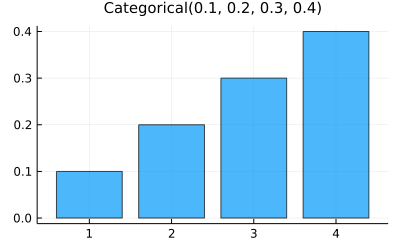

In [11]:
bar(support(categ), a -> pdf(categ, a); label="", title="Categorical(0.1, 0.2, 0.3, 0.4)", alpha=0.7)

### 問題: ルーレットの例の賞金の期待値と分散

ルーレットの例の分布は $\op{Categorical}(0.1, 0.2, 0.3, 0.4)$ に等しい.  この分布に従う確率変数を $X$ と書く.  賞金の確率変数 $g(X)$ は

$$
g(1) = 10000, \quad
g(2) = 3000, \quad
g(3) = 1000, \quad
g(4) = 300, \quad
$$

で定義される.  $X$ と $g(X)$ の期待値と分散と標準偏差を求めよ. 整数にならない標準偏差は小数点以下第1桁目まで求めよ.

__解答例:__ $X$ の期待値, 分散, 標準偏差はそれぞれ

$$
\mu_X = 1, \quad
\sigma^2_X = 1, \quad
\sigma_X = 1.
$$

$g(X)$ の期待値, 分散, 標準偏差はそれぞれ

$$
\mu_{g(X)} = 2020, \quad
\sigma^2_{g(X)} = 8055600, \quad
\sigma_{g(X)} \approx 2838.2.
$$

詳しい計算法については以下を見よ.  以下と同じ数値が得られれば正解である. 浮動小数点計算では小数点以下3桁まで正しければ正解であるとする(四捨五入すること).

__解答終__

$X$ の期待値と分散と標準偏差:

In [12]:
μ_X = 1 * 0.1 + 2 * 0.2 + 3 * 0.3 + 4 * 0.4
@show μ_X;

μ_X = 3.0


$X$ の分散と標準偏差:

In [13]:
σ²_X = (1 - 3)^2 * 0.1 + (2 - 3)^2 * 0.2 + (3 - 3)^2 * 0.3 + (4 - 3)^2 * 0.4
σ_X = √σ²_X
@show σ²_X σ_X;

σ²_X = 1.0
σ_X = 1.0


$g(X)$ の期待値:

In [14]:
μ_g = 10000 * 0.1 + 3000 * 0.2 + 1000 * 0.3 + 300 * 0.4 |> Int
@show μ_g;

μ_g = 2020


$g(X)$ の分散と標準偏差:

In [15]:
σ²_g = (10000 - 2020)^2 * 0.1 + (3000 - 2020)^2 * 0.2 + (1000 - 2020)^2 * 0.3 + (300 - 2020)^2 * 0.4 |> Int
σ_g = √σ²_g
@show σ²_g round(σ_g; digits=1);

σ²_g = 8055600
round(σ_g; digits = 1) = 2838.2


以下はJulia言語のより高級な機能を使った計算法である.

In [16]:
categ = Categorical(1//10, 2//10, 3//10, 4//10)
μ_X = mean(categ) |> Int
σ²_X = var(categ) |> Int
σ_X = std(categ) |> Int
@show μ_X σ²_X σ_X;

μ_X = 3
σ²_X = 1
σ_X = 1


期待値を取る操作は分布 $\op{dist}$ と確率変数 $f$ に期待値を対応させる函数 $E(f, \op{dist})$ として定義可能である.

In [17]:
E(f, dist::DiscreteUnivariateDistribution; imax = 10^6) =
    sum(x -> f(x) * pdf(dist, x), support(dist)[1:min(end, imax)])

E (generic function with 1 method)

$E(f, \op{dist})$ を使って $X$ の期待値と分散を計算すると以下のようになる.

In [18]:
categ = Categorical(1//10, 2//10, 3//10, 4//10)
μ_X = E(x -> x, categ) |> Int
σ²_X = E(x -> (x - μ_X)^2, categ) |> Int
σ_X = √σ²_X |> Int
@show μ_X σ²_X σ_X;

μ_X = 3
σ²_X = 1
σ_X = 1


In [19]:
g(x) = get((10000, 3000, 1000, 300), x, 0) # x = 1,2,3,4 のそれぞれを 10000, 3000, 1000, 300 に対応させる函数
μ_g = E(g, categ) |> Int
σ²_g = E(x -> (g(x) - μ_g)^2, categ) |> Int
σ_g = √σ²_g
@show μ_g σ²_g round(σ_g; digits=1);

μ_g = 2020
σ²_g = 8055600
round(σ_g; digits = 1) = 2838.2


### Bernoulli分布

$0 \le p \le 1$ と仮定する.  値が $1, 0$ になる確率をそれぞれ $p, 1-p$ とすることによって定まる離散分布を成功確率 $p$ の __Bernoulli分布__ (ベルヌーイ分布, ベルヌイ分布)と呼び, 次のように表す:

$$
\op{Bernoulli}(p).
$$

この分布の確率質量函数は次のようになる:

$$
P(1) = p, \quad P(0) = 1 - p.
$$

### 問題: Bernoulli分布の期待値と分散

Bernoulli分布 $\op{Bernoulli}(p)$ に従う確率変数 $X$ の期待値と分散を求めよ.  さらに分散の最大値とそれを与える $p$ を求めよ.

__解答例:__ $X$ の期待値 $E[X]$ と分散 $\var(X)$ は以下のように計算される:

$$
\begin{aligned}
&
E[X] = \sum_{x=1,0} x p(x) = 1p + 0(1-p) = p,
\\ &
E[X^2] = \sum_{x=1,0} x^2 p(x) = 1^2 p + 0^2(1-p) = p,
\\ &
\var(X) = E[X^2] - E[X]^2 = p - p^2 = p(1-p).
\end{aligned}
$$

$\var(X) = -(p - 1/2)^2 + 1/4$ なので分散 $\var(X)$ は $p = 1/2$ のとき最大値 $1/4$ になる.

__解答終__

In [20]:
p = 0.3
bern = Bernoulli(p)

Bernoulli{Float64}(p=0.3)

In [21]:
@show mean(bern) var(bern);

mean(bern) = 0.3
var(bern) = 0.21


In [22]:
@show rand(bern, 20);

rand(bern, 20) = Bool[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1]


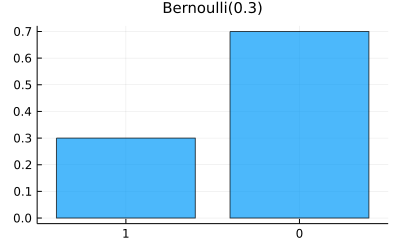

In [23]:
bar(0:1, x -> pdf(bern, 1 - x); label="", title="Bernoulli(0.3)", alpha=0.7)
plot!(; xtick=(0:1, 1 .- (0:1)), ytick=0:0.1:1)

### オッズの定義と例

成功確率 $p$ に対して, 失敗確率分の成功確率

$$
\frac{p}{1-p} = \frac{1}{1-p} - 1
$$

を __オッズ__ (odds)と呼ぶ. オッズは $0\le p < 1$ について単調増加函数になり, $p=1$ のときオッズは $\infty$ になると考えられる.

オッズは賭け事の世界では普通によく使われる用語である. オッズは勝利確率 $p$ の単調増加函数になっているので, 勝利確率とは別の勝ち易さの指標になっている.

例えば, 勝利確率が $p$ のギャンブルで勝利したときに賭けた金額の何倍の賞金をもらえることにすると公平になるだろうか?  勝利確率が $p$ の賭け事に1万円賭けたとき, 勝利したら賭けた1万円はそのままで賞金として $k$ 万円もらえ, 敗北したら賭けた1万円が全額没収されるとする. そのときの期待値は $pk - (1-p)$ 万円なので, 期待値が $0$ の公平なギャンブルにするためには $k$ をオッズの逆数にしなければいけない.  オッズの低い勝ち難いギャンブルではその分だけ勝利したときに沢山の賞金を獲得できないと損になる.

例えば, 勝利確率が $1/2$ のギャンブルではオッズは $(1/2)/(1/2) = 1$ になる.

例えば, 勝利確率が $1/3$ のギャンブルではオッズは $(1/3)/(2/3) = 1/2$ になり, 勝利したときに賭けた金額の2倍の賞金が得られるなら公平なギャンブルになる.  実際, そのとき, $1$ 万円を賭けると, $1/3$ の確率で $2$ 万円もらえ, $2/3$ の確率で $1$ 万円を失うので, 確かに期待値は $0$ になる. (これはBernoulli分布モデルにおける確率変数の期待値の例にもなっている.)

### オッズとロジットおよびロジスティック変換

確率 $p$ についてそのオッズを $u = p/(1 - p) = 1/(1 - p) - 1$ と書くと, 逆に確率はオッズで $p = u/(1 + u) = 1 - 1/(1 + u)$ と書ける.  これによって, $0 < p < 1$ と $0 < u < \infty$ のあいだの一対一の対応が得られる.  さらに $x = \log(u)$, $u = \exp(x)$ とおくと, $0 < u < \infty$ と $-\infty < x < \infty$ のあいだの一対一に対応も得られる.  $p$ と $x$ の関係を直接書き下すと, $p = \exp(x)/(1 + \exp(x)) = 1/(1 + \exp(-x))$,  $x = \log(p/(1-p))$ となる.  以上によって,

$$
p = \frac{u}{1+u} = \frac{e^x}{1 + e^x} = \frac{1}{1 + e^{-x}}, \quad
u = \frac{p}{1-p} = e^x, \quad
x = \log(u) = \log\frac{p}{1-p}
$$

によって,

$$
0 < p < 1, \quad
0 < u < \infty, \quad
-\infty < x < \infty
$$

のあいだの一対一対応が得られたことになる.  これらは賭け事とは無関係に非常によく使われる変数変換であり, 賭け事由来のオッズの概念はこのような形でも数学的に非常に役に立つことが知られている.

以下の変数変換はそれぞれ __ロジット変換__ (logit変換), __ロジスティック変換__ (logistic変換)と呼ばれている:

$$
x = \op{logit}(p) = \log\frac{p}{1-p}, \quad
p = \op{logistic}(x) = \frac{1}{1 + e^{-x}}.
$$

確率を意味するパラメータの $p$ を $-\infty$ から $\infty$ のあいだを自由に動ける変数 $x$ に変換してから様々な計算を行った方が都合が良い場合があるので, これらの変換はよく使われる.  (既存の統計ソフトが行ってくれる計算においてユーザーから見えない所でこのような変換が使われている場合もある.)

### Bernoulli試行の確率分布

Bernoulli分布 $\op{Bernoulli}(p)$ における $x=1,0$ の確率は

$$
P(x) = p^x (1-p)^{1-x}
$$

と書ける. 実際, $P(1) = p^1(1-p)^0 = p$ となり, $P(0) = p^x (1-p)^{1-x} = p^0(1-p)^1 = 1-p$ となる. これをBernoulli試行の場合に拡張しよう. 

試行回数 $n$ のBernoulli試行の結果は長さ $n$ の $1$ と $0$ からなる数列 $(x_1,\ldots,x_n)$ になる. そのような列全体の個数は, 各々の $x_k$ が2通りでそれらが $n$ 個あるから, $2^n$ 個になる.  ($p=0.5$ の場合を除いて, すべての場合の確率が等しくなるわけではない.)

Bernoulli試行が毎回確率 $p$ で $1$ が出て確率 $1-p$ で $0$ が出る独立な試行の繰り返しなので, 与えられた $x_1,\ldots,x_n=1,0$ について, $n$ 回のBernoulli試行の結果が $(x_1,\ldots,x_n)$ になる確率 $P(x_1,\ldots,x_n)$ は, Bernoulli分布における確率

$$
P(x_i) = p^{x_i}(1 - p)^{1 - x_i}
$$

の積

$$
P(x_1,\ldots,x_n) = P(x_1)\cdots P(x_n) =
\prod_{i=1}^n \left(p^{x_i} (1-p)^{1-x_i}\right) =
p^{x_1+\cdots+x_n}(1 - p)^{n - (x_1 + \cdots + x_n)}
$$

になると考えられる. (数学的にはこれによってBernoulli試行の確率分布を定める.) これは, $x_1,\ldots,x_n$ の中の $1$ (=「当たり」)の個数を $k$ と書くと,

$$
p^k (1-p)^{n-k}
$$

とシンプルに書来直される.

このようにして定まる集合 $\{\,(x_1,\ldots,x_n)\mid x_1,\ldots,x_n=1,0\,\}$ 上の離散分布を試行回数 $n$, 成功確率 $p$ の __Bernoulli試行の確率分布__ と呼ぶことにする.

### 問題: n=3, p=0.3 の場合のBernoulli試行の確率分布

$n=3$, $p=0.3$ のBernoulli試行の確率分布における確率質量函数を具体的に書き下し, 確率の総和がぴったり $1$ になることを確認せよ.

__解答例:__ $n=3$, $p=0.3$ のBernoulli試行の確率分布を考える.  $(x_1,x_2,x_3)$ を単に並べて $x_1x_2x_3$ と書くと,

$$
\{\, (x_1,x_2,x_3)\mid x_1,x_2,x_3=1,0\,\} = \{111, 011, 101, 110, 100, 010, 001, 000\}.
$$

確率質量函数の全体は以下のように記述される:

$$
\begin{aligned}
&
P(111) = 0.3^3 = 0.027,
\\ &
P(011) = P(101) = P(110) = 0.3^2\cdot 0.7 = 0.063,
\\ &
P(100) = P(010) = P(001) = 0.3\cdot 0.7^2 = 0.147,
\\ &
P(000) = 0.7^3 = 0.343.
\end{aligned}
$$

これら8通りの確率の和は

$$
0.027 + 3\cdot 0.063 + 3\cdot 0.147 + 0.343 =
0.027 + 0.189 + 0.441 + 0.343 = 1
$$

と確かにぴったり $1$ になっている.

__解答終__

In [24]:
27//1000 + 3*63//1000 + 3*147//1000 + 343//1000 |> Int

1

### Bernoulli試行から応用上基本的かつ重要な確率分布が大量に得られること

Bernoulli試行から以下の確率分布が得られる:

* Bernoulli分布 (これは $n=1$ のBernoulli試行の確率分布と $n=1$ の二項分布に等しい)
* 二項分布 ($n$ 回のBernoulli試行で出た $1$ の個数の分布)
* 幾何分布 (これは $k=1$ の負の二項分布に等しい)
* 負の二項分布 (Bernoulli試行を $k$ 回 $1$ が出るまで続けたときに出た $0$ の個数の分布)

これらの連続極限として,

* 正規分布 (二項分布の中心極限定理)
* Poisson分布 (二項分布の時間連続極限)
* ガンマ分布 (負の二項分布の時間連続極限)

も得られる.  正規分布, ガンマ分布, Poisson分布は極めて基本的な確率分布であり, 非常に頻繁に使われる.

__Bernoulli試行について十分に理解すれば, 他の重要かつ基本的な確率分布についても楽に理解できるようになるだろう!__

### 二項定理

$n$ 個から $k$ 個を選ぶ組み合わせの数を

$$
\binom{n}{k} = \frac{n!}{k!(n-k)!} = \frac{n(n-1)(n-2)\cdots(n-k+1)}{k!}
$$

と書き, __二項係数__ と呼ぶ.

互いに可換な文字 $x,y$ の和の $n$ 乗の展開したときの $x^k y^{n-k}$ の係数を $a_k$ と書く:

$$
(x + y)^n = \sum_{k=0}^n a_k x^k y^{n-k}.
$$

このとき, $a_k$ は掛けられてる $n$ 個の $x + y$ の中から $x$ をピックアップする $k$ 個を選ぶ組み合わせの数に等しいので, $a_k = \binom{n}{k}$ が成立する.  ゆえに

$$
(x + y) = \sum_{k=0}^n \binom{n}{k}x^k y^{n-k}.
$$

特に $y = 1$ のとき,

$$
(1 + x)^n = \sum_{k=0}^n \binom{n}{k}x^k.
$$

これらの結果を __二項定理__ と呼ぶ.

__注意:__  高校の教科書のように二項係数を ${}_nC_k$ と書いてもよいが, このノートではこの書き方をしない. 後で二項係数 $\binom{n}{k}$ の $n$ は整数でない場合にも拡張されることになる.

### 二項分布

__二項分布__ は試行回数 $n$, 成功確率 $p$ のBernoulli試行で生じる $1$ と $0$ からなる長さ $n$ の列の中の $1$ の個数の分布として得られる.

試行回数 $n$, 成功確率 $p$ のBernoulli試行において $1$ と $0$ からなる列 $(x_1, x_2, \ldots, x_n)$ が生じる確率は

$$
p^{x_1+\cdots+x_n}(1 - p)^{n - (x_1 + \cdots + x_n)}
$$

と書けるのであった.  $1$ と $0$ からなる列 $(x_1, x_2, \ldots, x_n)$ でそれが含む $1$ の個数 $x_1 + \cdots + x_n$ が $k$ になるものの個数は, $n$ 個の $x_i$ 達から $k$ 個の $1$ になるものを選ぶ組み合わせの数

$$
\binom{n}{k} = \frac{n!}{k!(n-k)!}
$$

になるので, 試行回数 $n$, 成功確率 $p$ のBernoulli試行において, $1$ の個数 $x_1 + \cdots + x_n$ が $k$ になる確率は

$$
P(k) = \binom{n}{k} p^k (1 - p)^{n-k} = \frac{n!}{k!(n-k)!} p^k (1 - p)^{n-k}
$$

になる. この確率質量函数で定義される集合 $\{0,1,\ldots,n\}$ 上の有限離散分布を __二項分布__ と呼び, 次のように表す:

$$
\op{Binomial}(n, p).
$$

二項分布における確率の総和が $1$ になることは二項定理を使えばただちに確認できる:

$$
\sum_{k=0}^n P(k) =
\sum_{k=0}^n \binom{n}{k} p^k (1 - p)^{n-k} =
(p + (1-p))^n = 1.
$$

### 問題: 二項分布の期待値と分散

$K$ は二項分布に従う確率変数であるとする:

$$
K \sim \op{Binomial}(n, p).
$$

$K$ の期待値と分散を求めよ.

__解答例:__ 二項定理を使う. $K$ の期待値は次のようにして得られる:

$$
\begin{aligned}
E[K] &=
\sum_{k=0}^n k P(k) =
\sum_{k=0}^n k \frac{n!}{k!(n-k)!} p^k (1 - p)^{n-k} =
\sum_{k=1}^n n \frac{(n-1)!}{(k-1)!(n-k)!} p^k (1 - p)^{n-k}
\\ & =
np \sum_{k=1}^n \binom{n-1}{k-1} p^{k-1} (1 - p)^{n-k} =
np (p + (1-p))^{n-1} =
np,
\end{aligned}
$$

上の計算の5番目の統合で二項定理を使っている.  この計算法と同様のアイデアで以下のように計算することができる:

$$
\begin{aligned}
E[K(K-1)] &=
\sum_{k=0}^n k(k-1) P(k) =
\sum_{k=2}^n k(k-1) \frac{n!}{k!(n-k)!} p^k (1 - p)^{n-k}
\\ & =
\sum_{k=1}^n n(n-1)\frac{(n-2)!}{(k-2)!(n-k)!} p^k (1 - p)^{n-k} =
n(n-1)p^2 \sum_{k=2}^n \binom{n-2}{k-2} p^{k-2} (1 - p)^{n-k}
\\ & =
n(n-1)p^2 (p + (1-p))^{n-2} =
n(n-1)p^2,
\end{aligned}
$$

この計算の5番目の統合でも上と同様に二項定理を使っている.  $\var(K) = E[K^2] - E[K]^2$ を使って $K$ の分散を計算しよう:

$$
\begin{aligned}
&
E[K(K-1)] = E[K^2] - E[K], 
\\ &
E[K^2] = E[K(K-1)] + E[K] = n(n-1)p^2 + np = n^2 p^2 - n p^2 + np = np(1-p) + n^2 p^2,
\\ &
\var(K) = E[K^2] - E[K]^2 = np(1-p) + n^2 p^2 - (np)^2 = np(1-p).
\end{aligned}
$$

__解答終__

__注意:__ 二項分布 $\op{Binomial}(n, p)$ に従う確率変数の期待値 $np$ と分散 $np(1-p)$ は $n=1$ の場合のBernoulli分布 $\op{Bernoulli}(p)$ の期待値と $p$ と分散 $p(1-p)$ のちょうど $n$ 倍になっている. 

期待値についてこの事実は次のように説明される. Bernoulli試行における $1$ と $0$ の列 $(x_1,\ldots,x_n)$ に $x_i$ を対応させる函数によって定まる確率変数を $X_i$ と書くと, $1$ と $0$ からなる列の中の $1$ の個数を意味する確率変数は $K = X_1 + \cdots + X_n$ になる.  $K$ の期待値が二項分布の期待値になる.  各々の $X_i$ は成功確率 $p$ のBernoulii分布に従うので, その期待値は $E[X_i] = p$ になり, 期待値を取る操作の線形性(加法性)より,

$$
E[K] = E[X_1] + \cdots + E[X_n] = p + \cdots + p = np.
$$

分散についても

$$
\var(K) = \var(X_1) + \cdots + \var(X_n) = p(1-p) + \cdots + p(1-p) = np(1-p)
$$

が成立することは偶然ではなく, 必然的にこうなる理由がある. この点については後で確率変数の独立性について説明してから詳しく説明する.  答えを先走って言うと, 独立な確率変数の和の分散はそれぞれの確率変数の分散の和に等しくなる.

二項分布における確率質量函数のグラフは以下のようになる.

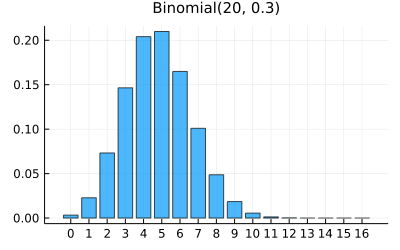

In [25]:
bin = Binomial(16, 0.3)
x = support(bin)
bar(x, x -> pdf(bin, x); label="", title="Binomial(20, 0.3)", alpha=0.7)
plot!(; xtick=x)

二項分布 $\op{Binomial}(n, p)$ はそれと等しい平均 $\mu=np$ と分散 $\sigma^2 = np(1-p)$ を持つ正規分布で近似されること(二項分布の中心極限定理)がよく知られている.

二項分布の中心極限定理は階乗に関するStirlingの(近似)公式を使えば示せるが, そこそこ面倒な計算が必要になる.  そのような計算を避けたい人も避けなかった人も, コンピュータで二項分布と正規分布のグラフを重ねてプロットすれば二項分布が正規分布で近似されることをすぐに納得できると思う.  正規分布については後で詳しく説明する.

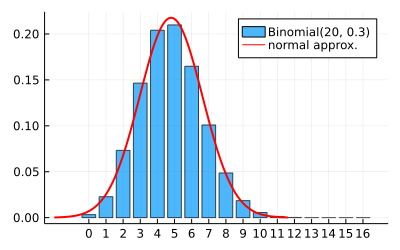

In [26]:
bin = Binomial(16, 0.3)
μ, σ = mean(bin), std(bin)
x = support(bin)
bar(x, x -> pdf(bin, x); label="Binomial(20, 0.3)", alpha=0.7)
plot!(; xtick=x)
plot!(Normal(μ, σ); label="normal approx.", lw=2, c=:red)

$p$ が小さな場合の二項分布は期待値 $np$ のPoisson分布で近似される.

より正確に言うと, 固定された $\lambda > 0$ について, $p = \lambda/n$ とおくと, 二項分布 $\op{Binomial}(n, p)$ は $n\to\infty$ でPoisson分布 $\op{Poisson}(\lambda)$ に近付く.  Poisson分布(ポアソン分布)の定義を知らない人はこれをPoisson分布の定義だと思ってもよい.  この点については後で説明する予定である.

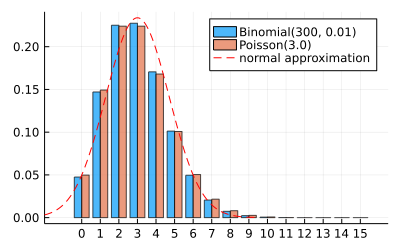

In [27]:
λ = 3
n = 100
p = λ/n
bin = Binomial(n, p)
μ, σ = mean(bin), std(bin)
x = 0:5λ
groupedbar(x, [pdf.(bin, x) pdf.(Poisson(n*p), x)];
    label=["Binomial(300, 0.01)" "Poisson($(n*p))"], alpha=0.7)
plot!(; xtick=x, xlim=(-2, 16.5))
plot!(Normal(μ, σ); label="normal approximation", lw=1, c=:red, ls=:dash)

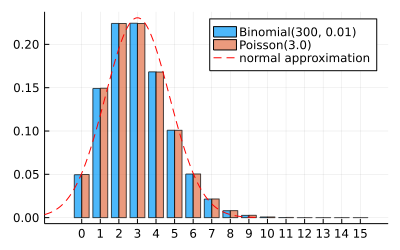

In [28]:
λ = 3
n = 1000
p = λ/n
bin = Binomial(n, p)
μ, σ = mean(bin), std(bin)
x = 0:5λ
groupedbar(x, [pdf.(bin, x) pdf.(Poisson(n*p), x)];
    label=["Binomial(300, 0.01)" "Poisson($(n*p))"], alpha=0.7)
plot!(; xtick=x, xlim=(-2, 16.5))
plot!(Normal(μ, σ); label="normal approximation", lw=1, c=:red, ls=:dash)

### 問題: 当たりが30%の確率で出るくじを100回引いた場合

当たりが毎回 $p = 30\% = 0.3$ の確率で出るくじを $n = 100$ 回引いたときに当たりが出た回数 $K$ は二項分布 $\op{Binomial}(n, p)$ に従う確率変数とみなされる.

(1) 当たりの回数 $K$ の期待値と分散と標準偏差を求めよ.

(2) 当たりの回数 $K$ が25回以下になる確率と20回以下になる確率を求めよ.

(3) 当たりの回数 $K$ が35回以上になる確率と40回以上になる確率を求めよ.

有効桁3桁で求めよ.

__解答例:__ $p = 0.3$, $n = 100$ とおく.

(1) $K$ の期待値, 分散, 標準偏差:

$$
E[K] = np = 30, \quad
\var(K) = np(1-p) = 21, \quad
\std(K) = \sqrt{\var(K)} \approx 4.58.
$$

(2) $K\le 25$ となる確率:

$$
P(K\le 25) = \sum_{k=0}^{25} \binom{n}{k}p^k(1-p)^{n-k} \approx 0.163.
$$

$K\le 30$ となる確率:

$$
P(K\le 20) = \sum_{k=0}^{20} \binom{n}{k}p^k(1-p)^{n-k} \approx 0.0165.
$$

(2) $K\ge 35$ となる確率:

$$
P(K\ge 35) = \sum_{k=35}^{100} \binom{n}{k}p^k(1-p)^{n-k} \approx 0.163.
$$

$K\ge 40$ となる確率:

$$
P(K\ge 40) = \sum_{k=40}^{100} \binom{n}{k}p^k(1-p)^{n-k} \approx 0.0210.
$$

__解答終__

__注意:__ [WolframAlpha](https://www.wolframalpha.com/)では確率 $P(K \le 25)$ を

* [sum_{k=0}^{25} binom(100, k) 0.3^k (1 - 0.3)^{100-k}](https://www.wolframalpha.com/input?i=sum_%7Bk%3D0%7D%5E%7B25%7D+binom%28100%2C+k%29+0.3%5Ek+%281+-+0.3%29%5E%7B100-k%7D)

と入力して求めることができる.  他の場合も試してみよ.  (もちろんJulia言語を導入して使ってもよい.)

In [29]:
p = 0.3
n = 100
@show n*p
@show n*p*(1-p)
@show √(n*p*(1-p))
for Kmax in (25, 20)
    @eval @show sum(binomial(big(n), k)*p^k*(1-p)^(n-k) for k in 1:$Kmax) |> Float64
end
for Kmin in (35, 40)
    @eval @show sum(binomial(big(n), k)*p^k*(1-p)^(n-k) for k in $Kmin:n) |> Float64
end

n * p = 30.0
n * p * (1 - p) = 21.0
√(n * p * (1 - p)) = 4.58257569495584
sum((binomial(big(n), k) * p ^ k * (1 - p) ^ (n - k) for k = 1:25)) |> Float64 = 0.16313010446635048
sum((binomial(big(n), k) * p ^ k * (1 - p) ^ (n - k) for k = 1:20)) |> Float64 = 0.016462853241869056
sum((binomial(big(n), k) * p ^ k * (1 - p) ^ (n - k) for k = 35:n)) |> Float64 = 0.16285828837178626
sum((binomial(big(n), k) * p ^ k * (1 - p) ^ (n - k) for k = 40:n)) |> Float64 = 0.02098857600392457


In [30]:
p = 0.3
n = 100
@eval @show bin = Binomial($n, $p)
@show mean(bin)
@show var(bin)
@show std(bin)
for Kmax in (25, 20)
    @eval @show cdf(bin, $Kmax)
end
for Kmin in (35, 40)
    @eval @show ccdf(bin, $Kmin - 1)
end

bin = Binomial(100, 0.3) = Binomial{Float64}(n=100, p=0.3)
mean(bin) = 30.0
var(bin) = 21.0
std(bin) = 4.58257569495584
cdf(bin, 25) = 0.16313010446635237
cdf(bin, 20) = 0.0164628532418695
ccdf(bin, 35 - 1) = 0.16285828837178704
ccdf(bin, 40 - 1) = 0.020988576003924644


### 幾何分布

$0< p \le 1$ であると仮定し, $m=0,1,2,\ldots$ であるとする.

確率 $p$ で $1$ が確率 $1-p$ で $0$ が生じるようなBernoulli試行を続けたとき, ちょうど $m+1$ 回目で $1$ が初めて出る確率は, 
$m$ 回 $0$ が続いて $m+1$ 回目に $1$ が出る確率

$$
(1-p)^m \times p
$$

に等しいので,

$$
P(m) = p(1 - p)^m
$$

になる.  この確率質量函数で定義される可算集合 $\{0,1,2,\ldots\}$ 上の無限離散分布を __幾何分布__ (geometric distribution)と呼び, 次のように表す:

$$
\op{Geometric}(p).
$$

幾何分布における確率の総和が $1$ になることは, 等比級数の和を使って, 次のように証明される:

$$
\sum_{m=0}^\infty P(m) = 
p \sum_{m=0}^\infty (1 - p)^m =
\frac{p}{1 - (1 - p)} = 1.
$$

$1 - (1 - p)$ が $p$ になることがこれ以後頻繁に現れる.

幾何分布の確率質量函数の形は次のようになる.

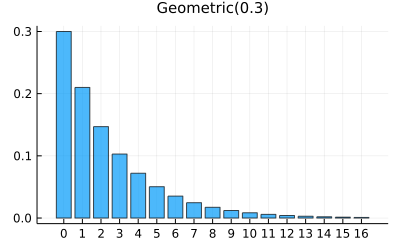

In [31]:
geom = Geometric(0.3)
x = 0:16
bar(x, x -> pdf(geom, x); label="", title="Geometric(0.3)", alpha=0.7)
plot!(; xtick = x)

$p$ が小さい場合の幾何分布は平均 $\lambda = 1/p$ の指数分布で近似される: $\lambda$ が大きなとき, 

$$
p(1-p)^m =
\frac{1}{\lambda}\left(1 - \frac{1}{\lambda}\right)^m \approx
\frac{1}{\lambda}\exp\left(-\frac{m}{\lambda}\right).
$$

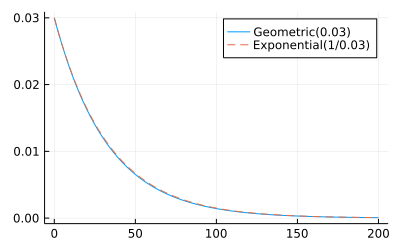

In [32]:
geom = Geometric(0.03)
p, = params(geom)
x = 0:200
plot(x, x -> pdf(geom, x); label="Geometric($p)")
plot!(Exponential(1/p), 0, 200; ls=:dash, label="Exponential(1/$p)")

### 幾何分布の期待値と分散

幾何分布に従う確率変数 $M$ の期待値と分散は次のようになる:

$$
E[M] = \frac{1-p}{p}, \quad
\var(M) = \frac{1-p}{p^2}.
$$

詳しくは以下のように計算される. 上で経験した等比級数の和の計算から,

$$
\sum_{m=0}^\infty (1 - p)^m = \frac{1}{p}
$$

となることもわかる.  両辺を $p$ で微分して $-1$ 倍する操作を2回施すと,

$$
\sum_{m=1}^\infty m(1-p)^{m-1} = \frac{1}{p^2}, \quad
\sum_{m=2}^\infty m(m-1)(1-p)^{m-2} = \frac{2}{p^3}.
$$

これらの公式を使うと,

$$
\begin{aligned}
&
E[M] = \sum_{m=0}^\infty m P(m) =
\sum_{m=1}^\infty m p (1-p)^m = 
p(1-p)\sum_{m=1}^\infty m(1-p)^{m-1} =
p(1-p)\frac{1}{p^2} =
\frac{1-p}{p},
\\ &
E[M(M-1)] =
\sum_{m=0}^\infty m(m-1) P(m) =
\sum_{m=2}^\infty m(m-1) p(1-p)^m
\\ & \quad =
p(1-p)^2 \sum_{m=2}^\infty m(m-1)(1-p)^{m-2} =
p(1-p)^2 \frac{2}{p^3} =
\frac{2(1-p)^2}{p^2}
\\ &
E[M(M-1)] = E[M^2] - E[M],
\\ &
E[M^2] = E[M(M-1)] + E[M] = \frac{2(1-p)^2}{p^2} + \frac{1-p}{p},
\\ &
\var(M) = E[M^2] - E[M]^2 =
\frac{2(1-p)^2}{p^2} + \frac{1-p}{p} - \frac{(1-p)^2}{p^2} =
\frac{(1-p)^2}{p^2} + \frac{p(1-p)}{p^2} =
\frac{1-p}{p^2}.
\end{aligned}
$$

$N = M+1$ とおく.  $N$ は始めて $1$ が出るまでの試行回数を意味する確率変数になる. $N$ の確率質量函数は

$$
P(n-1) = p(1-p)^{n-1}
$$

になる. $N$ の期待値と分散は上の結果より, 次のようになる:

$$
E[N] = E[M] + 1 = \frac{1}{p},
\quad
\var(N) = \var(M) = \frac{1-p}{p^2}.
$$

$E[N] = 1/p$ の意味: 当たりが確率 $p$ で出るガチャを回し続けるとき, 当たりが初めて出るまでに回す回数の期待値は $1/p$ になる.

__注意・警告:__ 例えば, 当たりが $1\% = 0.01$ の確率で出るガチャを回し続けたときに, 当たりが初めて出るまでに回す回数の期待値は $1/0.01=100$ 回になる.  これは「だいたい100回程度ガチャを回せばほぼ確実に当たりが出ること」を意味 __しない__.  以下の問題を解いてみよ.

### 問題: 当たりが出る確率が1%のガチャを当たりが出るまで回す場合

当たりが1%の確率で出るガチャを引き続けて当たりが出るまで回す回数を $N$ と書く.

(1) $N$ の期待値と分散と標準偏差を求めよ.

(2) 当たりが初めて出るまでの回数が150回以上になる確率と200回以上になる確率と300回以上になる確率を求めよ.

確率や標準偏差の値は有効桁3桁以上が合っていれば正解とする.

__解答例:__ $p = 0.01$ とおく.

(1) $N$ の期待値と分散と標準偏差:

$$
E[N] = \frac{1}{p} = 100, \quad
\var(N) = \frac{1-p}{p^2} = 9900, \quad
\std(N) = \sqrt{\var(N)} \approx 99.5.
$$

(2) $N$ が150回以上になる確率 = 最初の149回分がすべて外れの確率:

$$
(1 - p)^{149} = 0.99^{149} \approx 0.224.
$$

$N$ が200回以上になる確率 = 最初の199回分がすべて外れの確率:

$$
(1 - p)^{199} = 0.99^{199} \approx 0.135.
$$

$N$ が300回以上になる確率 = 最初の199回分がすべて外れの確率:

$$
(1 - p)^{299} = 0.99^{299} \approx 0.0495.
$$

__解答終__

__注意・警告続き:__ 当たりが出る確率が1%のガチャを当たりが出るまで回し続ける人達が沢山いると, 300回以上回してしまう人が5%程度すなわち20人に1人程度生じるということになる.  このようなガチャを当たりが出るまで回し続ける場合にあなたは, その20人の1人になってしまうことを覚悟しておくべきだと思われる.

__注意:__ $p$ が小さな幾何分布の標準偏差は

$$
\sqrt{\frac{1-p}{p^2}} \approx \sqrt{\frac{1}{p^2}} = \frac{1}{p}
$$

となる. 実際, 上の場合も $\var(N)$ はほぼ $1/p = 100$ になっている.

In [33]:
p = 0.01
@show 1/p
@show (1 - p)/p^2
@show √((1 - p)/p^2)
for Nmin in (150, 200, 300)
    @eval @show (1 - p)^($Nmin - 1)
end

1 / p = 100.0
(1 - p) / p ^ 2 = 9900.0
√((1 - p) / p ^ 2) = 99.498743710662
(1 - p) ^ (150 - 1) = 0.2236886739786474
(1 - p) ^ (200 - 1) = 0.13533300490703204
(1 - p) ^ (300 - 1) = 0.04953625663766235


In [34]:
@show mean(Geometric(0.01)) + 1
@show var(Geometric(0.01))
@show std(Geometric(0.01))
for Nmin in (150, 200, 300)
    @eval @show ccdf(Geometric(0.01), $(Nmin - 1) - 1)
end

mean(Geometric(0.01)) + 1 = 100.0
var(Geometric(0.01)) = 9900.0
std(Geometric(0.01)) = 99.498743710662
ccdf(Geometric(0.01), 149 - 1) = 0.22368867397864767
ccdf(Geometric(0.01), 199 - 1) = 0.13533300490703226
ccdf(Geometric(0.01), 299 - 1) = 0.049536256637662465


Monte Carlo 法による近似計算:

In [35]:
N = rand(Geometric(0.01), 10^8) .+ 1
@show mean(N)
@show var(N)
@show std(N)
@show mean(≥(150), N)
@show mean(≥(200), N)
@show mean(≥(300), N);

mean(N) = 99.99065754
var(N) = 9898.741484625854
std(N) = 99.4924192319488
mean((≥)(150), N) = 0.22367281
mean((≥)(200), N) = 0.1352877
mean((≥)(300), N) = 0.04951668


### 負の二項展開

任意の数 $a$ と0以上の整数 $m$ について, __二項係数__ (binomial coefficients)を

$$
\binom{a}{m} = \frac{a(a-1)(a-2)\cdots(a-m+1)}{m!}
$$

と定める. たとえば, $m=0,1,2,3$ の場合には,

$$
\binom{a}{0} = 1, \;
\binom{a}{1} = a, \;
\binom{a}{2} = \frac{a(a-1)}{2}, \;
\binom{a}{3} = \frac{a(a-1)(a-2)}{3!}.
$$

$a = n$ も0以上の整数のとき, これは組み合わせの数と一致する:

$$
\binom{n}{m} = \frac{n!}{m!(n-m)!}.
$$

$f(x) = (1 + x)^a$ について,

$$
f'(x) = a(1+x)^{a-1}, \;
f''(x) = a(a-1)(1+x)^{a-2}, \;
\ldots\,\;
f^{(m)}(x) = a(a-1)\cdots(a-m+1)(1+x)^{a-m}
$$

なので,

$$
f^{(m)}(0) = a(a-1)\cdots(a-m+1), \quad
\frac{1}{m!}f^{(m)}(0) = \binom{a}{m}.
$$

ゆえに, $f(x)=(1+x)^a$ は $x=0$ で次のようにTaylor展開される:

$$
(1+x)^a = f(x) =
\sum_{m=0}^\infty \frac{1}{m!}f^{(m)}(0) x^m =
\sum_{m=0}^\infty \binom{a}{m} x^m =
1 + ax + \frac{a(a-1)}{2}x^2 + \frac{a(a-1)(a-2)}{3!}x^3 + \cdots
$$

このTaylor展開は $|x|<1$ で常に収束している. $a=n$ が0以上の整数の場合には $m=0,1,\ldots,n$ に関する有限和になり, 通常の二項定理が得られる.  このTaylor展開を __二項展開__ (binomial expansion)と呼ぶ.

次の形の二項係数を __負の二項係数__ と呼ぶことにする:

$$
(-1)^m\binom{-a}{m} = (-1)^m\frac{(-a)(-a-1)\cdots(-a-m+1)}{m!} =
\frac{a(a+1)\cdots(a+m-1)}{m!} = \binom{a+m-1}{m}.
$$

上の二項展開の $x, a$ を $-x, -a$ で置き換えることによって, $|x|<1$ のとき,

$$
(1 - x)^{-a} = \sum_{m=0}^\infty (-1)^m\binom{-a}{m}x^m =
\sum_{m=0}^\infty \binom{a+m-1}{m} x^m.
$$

この公式を __負の二項展開__ と呼ぶことにする.

### 負の二項分布

$0< p \le 1$ であると仮定し, $k$ は正の整数であるとし, $m=0,1,2,\ldots$ であるとする.

確率 $p$ で $1$ が確率 $1-p$ で $0$ が生じるようなBernoulli試行を続けたとき, $1$ が合計でちょうど $k$ 個出たときの試行回数が $k + m$ になる確率は, 最初の $k+m-1$ 回中の $0$ の個数が $m$ 個で最後の $m+k$ 回目に $1$ が出る確率

$$
\binom{k+m-1}{m} p^{k-1}(1-p)^m \times p
$$

に等しいので,

$$
P(m) = \binom{k+m-1}{m} p^k (1 - p)^m = (-1)^m\binom{-k}{m} p^k (1 - p)^m
$$

になる.  この確率質量函数で定義される可算集合 $\{0,1,2,3,\ldots\}$ 上の無限離散分布を __負の二項分布__ (negative binomial distribution)と呼び, 次のように表す:

$$
\op{NegativeBinomial}(k, p).
$$

負の二項分布における確率の総和が $1$ になることは, 前節の負の二項展開からただちに得られる:

$$
\sum_{m=0}^\infty P(m) =
p^k \sum_{m=0}^\infty \binom{k+m-1}{m}(1 - p)^m =
p^k (1 - (1 - p))^{-k} = p^k p^{-k} = 1.
$$

__注意:__ 以上および以下の計算は $k$ が正の整数でなくても,

$$
\binom{k+m-1}{m} = \frac{k(k+1)\cdots(k+m-1)}{m!} > 0 \quad (k > 0,\; m = 0,1,2,3,\ldots)
$$

なので, $k>0$ ならば確率質量函数

$$
P(m) = \binom{k+m-1}{m} p^k (1 - p)^m = (-1)^m\binom{-k}{m} p^k (1 - p)^m
\quad (m=0,1,2,3,\ldots)
$$

は定義されている. 期待値と分散の計算も上で計算した結果と同じになる. このように拡張された離散分布も負の二項分布と呼ばれる.

### 負の二項分布の期待値と分散

$M$ は負の二項分布 $\op{NegativeBinomial}(k, p)$ に従う確率変数であるとし, $N = M + k$ とおく.

$M$ は成功確率 $p$ のBernoulli試行をちょうど $k$ 回 $1$ が出るまで繰り返すときに出た $0$ の個数を意味する確率変数にになる.  

$N$ はちょうど $k$ 回 $1$ が出たときの試行回数を意味する確率変数であり, その確率質量函数は

$$
P(n-k) = \binom{n-1}{n-k} p^k (1 - p)^{n-k} = \binom{n-1}{k-1} p^k (1 - p)^{n-k}
$$

になる(この式の形は二項分布の確率質量函数に近いが少しだけ違っている). 

それらの期待値と分散は次のようになる:

$$
E[M] = \frac{k(1-p)}{p}, \quad
E[N] = E[M] + k = \frac{k}{p}, \quad
\var(M) = \var(N) = \frac{k(1-p)}{p^2}.
$$

これらは以下のようにして示される.  二項係数について

$$
\begin{aligned}
&
m\binom{a+m-1}{m} =
m\frac{a(a-1)\cdots(a+m-1)}{m!}
\\ & \quad =
a\frac{(a-1)\cdots(a-m+1)}{(m-1)!} =
a\binom{a+m-1}{m-1},
\\ &
m(m-1)\binom{a+m-1}{m} =
m(m-1)\frac{a(a-1)(a-2)\cdots(a+m-1)}{m!}
\\ & \quad =
a(a-1)\frac{(a-2)\cdots(a+m-1)}{(m-2)!} =
a(a-1)\binom{a+m-1}{m-2}
\end{aligned}
$$

が成立することとと負の二項展開を使うと, 負の二項分布に従う確率変数 $M$ の期待値と分散は以下のように計算される:

$$
\begin{aligned}
&
E[M] = \sum_{m=0}^\infty m P(m) =
p^k \sum_{m=1}^\infty m\binom{k+m-1}{m}(1 - p)^m =
p^k \sum_{m=1}^\infty k\binom{k+m-1}{m-1}(1 - p)^m 
\\ & \quad =
p^k k(1-p)\sum_{m=1}^\infty \binom{(k+1)+(m-1)-1}{m-1}(1 - p)^{m-1} =
p^k k(1-p) (1-(1-p))^{-(k+1)}
\\ & \quad =
p^k k(1-p) p^{-(k+1)} =
\frac{k(1-p)}{p},
\\ &
E[M(M-1)] = \sum_{m=0}^\infty m(m-1) P(m) =
p^k \sum_{m=2}^\infty m(m-1)\binom{k+m-1}{m}(1 - p)^m =
p^k \sum_{m=2}^\infty k(k-1)\binom{k+m-1}{m-2}(1 - p)^m
\\ & \quad =
p^k k(k-1)(1-p)^2\sum_{m=1}^\infty \binom{(k+2)+(m-2)-1}{m-2}(1 - p)^{m-2} =
p^k k(k-1)(1-p)^2 (1-(1-p))^{-(k+2)}
\\ & \quad =
p^k k(k-1)(1-p)^2 p^{-(k+2)} =
\frac{k(k-1)(1-p)^2}{p^2},
\\ &
E[M(M-1)] = E[M^2] - E[M],
\\ &
E[M^2] = E[M(M-1)] + E[M] =
\frac{k(k-1)(1-p)^2}{p^2} + \frac{k(1-p)}{p},
\\ &
\var(M) = E[M^2] - E[M]^2 =
\frac{k(k-1)(1-p)^2}{p^2} + \frac{k(1-p)}{p} - \frac{k^2(1-p)^2}{p^2}
\\ & \quad =
\frac{-k(1-p)^2}{p^2} + \frac{kp(1-p)}{p^2} =
\frac{k(1-p)}{p^2}.
\end{aligned}
$$

上の結果より, $N = M + k$ の期待値と分散は次のようになる:

$$
E[N] = E[M] + k = \frac{k}{p}, \quad
\var(N) = \var(M) = \frac{k(1-p)}{p^2}.
$$

__注意:__ 負の二項分布に従う確率変数の期待値と分散は $k=1$ の場合の幾何分布の期待値と分散のちょうど $k$ 倍になっている.  これは偶然ではなく, 必然的にこうなる理由がある. この点については後で確率変数の独立性について説明してから詳しく説明する. 

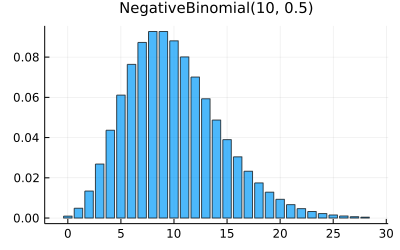

In [36]:
negbin = NegativeBinomial(10, 0.5)
μ, σ = mean(negbin), std(negbin)
x = 0:round(Int, μ + 4σ)
bar(x, x -> pdf(negbin, x); label="", title="NegativeBinomial(10, 0.5)", alpha=0.7)
plot!(; xtick=0:5:maximum(x)+5)

$M$ は負の二項分布 $\op{NegativeBinomial}(k, p)$ に従う確率変数であるとし, $N=M+1$ とおく.  $L$ は正の整数であるとし, $\theta = 1/(Lp)$, $T = N/L$ とおくと, $L$ を大きくしたとき, $T$ の分布はガンマ分布 $\op{Gamma}(k, \theta)$ で近似される.

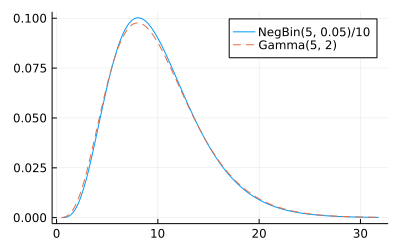

In [37]:
k, θ = 5, 2
L = 10
p = 1/(L*θ)

negbin = NegativeBinomial(k, p)
μ, σ = mean(negbin), std(negbin)
m = 0:round(Int, μ + 5σ)
n = m .+ k
t = n ./ L
plot(t, pdf.(negbin, m)*L; label="NegBin($k, $p)/$L")
plot!(t, pdf.(Gamma(k, θ), t); label="Gamma($k, $θ)", ls=:dash)

### 問題: 当たりが出る確率が5%のガチャを当たりが5回出るまで回す場合

当たりが $p = 1\% = 0.05$ で出るガチャを当たりがちょうど $k = 5$ 回出るまでに回した回数を $N$ と書くことにする.  $N$ は負の二項分布 $\op{NegativeBinomial}(k, p)$ に従う確率変数 $M$ によって $N = M + k$ と書ける.

(1) $N$ の期待値と分散と標準偏差を求めよ.

(2) $N$ が150回以上, 200回以上になる確率を求めよ.

確率や標準偏差の値は有効桁3桁以上が合っていれば正解とする.

__解答例:__ $p = 0.05$, $k = 5$ とおく.

(1) $N$ の期待値と分散と標準偏差:

$$
E[N] = \frac{k}{p} = 100, \quad
\var(N) = \frac{k(1-p)}{p^2} = 1900, \quad
\std(N) = \sqrt{\var(N)} \approx 43.58.
$$

(2) ($N \ge 150$ となる確率) = 1 $-$ ($N \le 149$ となる確率):

$$
1 - \sum_{n = 1}^{149} \binom{n - 1}{k - 1} p^k (1 - p)^{n - k} \approx 0.129.
$$

($N \ge 200$ となる確率) = 1 $-$ ($N \le 199$ となる確率):

$$
1 - \sum_{n = 1}^{199} \binom{n - 1}{k - 1} p^k (1 - p)^{n - k} \approx 0.0273.
$$

__解答終__

In [38]:
p = 5//100
k = 5
@show 5/p 5(1 - p)/p^2 √(5(1 - p)/p^2);

5 / p = 100//1
(5 * (1 - p)) / p ^ 2 = 1900//1
√((5 * (1 - p)) / p ^ 2) = 43.58898943540674


In [39]:
p = 0.05
k = 5
for Nmin in (150, 200)
    @show 1 - sum(binomial(n-1, k-1)*p^k*(1-p)^(n-k) for n in 1:Nmin-1)
end

1 - sum((binomial(n - 1, k - 1) * p ^ k * (1 - p) ^ (n - k) for n = 1:Nmin - 1)) = 0.12922049010314218
1 - sum((binomial(n - 1, k - 1) * p ^ k * (1 - p) ^ (n - k) for n = 1:Nmin - 1)) = 0.02734419238495378


In [40]:
p = 0.05
k = 5
@eval @show negbin = NegativeBinomial($k, $p)
@show mean(negbin) + k
@show var(negbin)
@show std(negbin)
for Nmin in (150, 200)
    @show ccdf(negbin, (Nmin - 1) - k)
end

negbin = NegativeBinomial(5, 0.05) = NegativeBinomial{Float64}(r=5.0, p=0.05)
mean(negbin) + k = 100.0
var(negbin) = 1899.9999999999995
std(negbin) = 43.58898943540674
ccdf(negbin, (Nmin - 1) - k) = 0.12922049010313866
ccdf(negbin, (Nmin - 1) - k) = 0.027344192384949475


Monte Carlo 法による近似計算:

In [41]:
M = rand(negbin, 10^8) .+ k
@show mean(N)
@show var(N)
@show std(N)
@show mean(≥(150), N)
@show mean(≥(200), N);

mean(N) = 99.99065754
var(N) = 9898.741484625854
std(N) = 99.4924192319488
mean((≥)(150), N) = 0.22367281
mean((≥)(200), N) = 0.1352877


## 連続分布

### 連続分布と確率密度函数

$a, b\in \R\cup\{\pm\infty\}$, $a<b$ であるとし, 区間 $(a, b) = \{\,x\in\R\mid a<x<b\,\}$ を考える. ($a=-\infty$ や $b=\infty$ となっている場合があるので注意せよ.) このとき, 実数 $x\in (a, b)$ を0以上の実数に対応させる函数 $p(x)$ で

$$
\int_a^b p(x)\,dx = 1
$$

を満たすものを区間 $(a, b)$ 上の __確率密度函数__ (probability density function, pdf)もしくは単に __密度函数__ (density function)と呼ぶ. 

密度函数の定義域を実数全体に拡張する場合には区間 $(a, b)$ の外での値は $0$ にする.

区間 $(a, b)$ 上の確率密度函数が与えられているとき, 区間 $(a, b)$ 上の __連続確率分布__ もしくは __連続分布__ が与えられているいう.　(区間の両端を区間に含めても含めなくてもよいが, 連続分布の場合にはその違いを気にする必要はない.  なぜならば, 連続分布において一点の確率は0だからである.)

確率分布を単に分布と呼ぶことがよくある.

1次元の区間を $n$ 次元の $\R^n$ における領域に一般化して, $n$ 変量の連続分布を定義することもできる. その場合には上の積分は $n$ 重積分になる.  多変量連続分布については後で具体的な例を通して説明することにする.

### _一様分布_

区間 $(a, b)$ 上の確率密度函数

$$
p(x) = \frac{1}{b - a} \quad (a < x < b)
$$

によって与えられる連続分布を区間 $(a, b)$ 上の一様分布と呼び, 次のように表す:

$$
\op{Uniform}(a, b).
$$

半開区間 $[a, b)$, $(a, b]$ や閉区間 $[a, b]$ 上の一様分布も同様に定義されるが, 区間の両端を含めるか否かは本質的ではない.

コンピュータでの `rand()` 函数は近似的に区間 $[0, 1)$ 上の一様分布に従う確率変数とみなされる.

一様分布 $\op{Uniform}(0,1)$ の確率密度函数のグラフは以下のようになる.

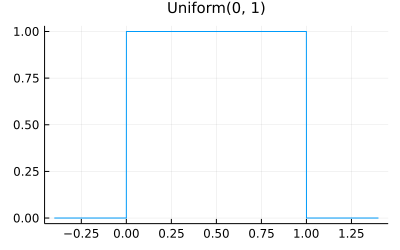

In [42]:
plot(Uniform(0, 1), -0.4, 1.4; label="", title="Uniform(0, 1)")

### 正規分布

$\mu \in \R$, $\sigma \in \R$, $\sigma > 0$ と仮定する.  実数直線 $\R = (-\infty, \infty)$ 上の確率密度函数

$$
p(x) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)
$$

によって与えられる連続分布を平均 $\mu$, 分散 $\sigma^2$ の __正規分布__ (normal distribution)と呼び, 

$$
\op{Normal}(\mu, \sigma)
$$

と表す.  パラメータ $\sigma$ は標準偏差と呼ばれる.

特に平均 $0$, 分散 $1$ の正規分布を __標準正規分布__ (standard normal distribution)と呼び, 

$$
\op{Normal}() = \op{Normal}(0,1)
$$

と表すことにする.

__分布のパラメータとしての平均 $\mu$ や分散 $\sigma^2$ と後で出て来る標本の平均や分散を概念的に厳密に区別する必要がある.__

互いに密接に関係はしているが異なる概念を同じ用語で呼ぶことが原因で初学者は大抵の場合混乱する. 

__混乱せずに済ますためには__ 「平均」や「分散」という用語を使う場合には必ず「○○分布の平均と分散」や「確率変数○○の平均と分散」や「標本○○の平均と分散」のように __「～の平均と分散」という言い方をすればよいだろう.__

正規分布の確率密度函数のグラフは以下の形になる.  この形は「釣鐘型」(bell-shaped)と表現されることが多い.

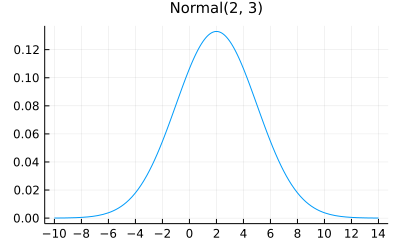

In [43]:
plot(Normal(2, 3), 2-4*3, 2+4*3; label="", title="Normal(2, 3)", xtick=-100:2:100)

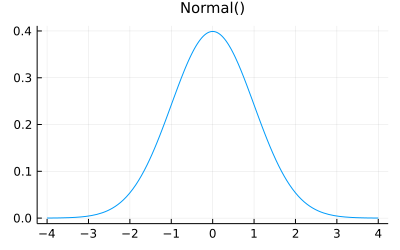

In [44]:
plot(Normal(), -4, 4; label="", title="Normal()", xtick=-100:100)

### 連続確率変数

区間 $(a, b)$ 上の確率密度函数 $p(x)$ が与えられているとする.

さらに, 区間 $(a, b)$ 上の実数値函数を __連続分布における確率変数__ と呼ぶ. (積分が定義できるような良い函数に限ることにする. 複素数値, ベクトル値, 行列値の連続確率変数を考えることもある.)

たとえば, $x\in(a,b)$ をそれ自身 $x\in\R$ に対応させる函数は確率変数とみなされる. 以下ではそれを $X$ と書き, 確率密度函数 $p(x)$ を持つ __連続確率変数__ と呼ぶ(確率密度函数を持つ確率変数を連続確率変数と呼ぶ).  そのとき,

$$
X \sim p(x)
$$

と書くことがある. さらに, 確率密度函数 $p(x)$ で与えられる連続分布の名前が $\op{Dist}$ のとき, $X$ は分布 $\op{Dist}$ に従う確率変数であると言い(「従う」は "follow" の訳語), 以下のように書く:

$$
X \sim \op{Dist}.
$$

### 連続確率変数に関する確率とその期待値

値が $a \le c\le d \le b$ であると仮定する.

確率密度函数 $p(x)$ を持つ確率変数 $X$ が $c$ より大きく $d$ より小さくなる確率 $P(c < X < d)$ を積分を使って

$$
P(c < X < d) = \int_c^d p(x)\,dx
$$

と定義する.  $c$ 以上 $d$ 以下の確率 $P(c\le X \le d)$ なども同じ積分の値で定義する:

$$
P(c \le X \le d) = \int_c^d p(x)\,dx.
$$

特に $X$ の値がぴったり $c$ に等しくなる確率 $P(X = c)$ は次のように $0$ になる:

$$
P(X = c) = P(c\le X\le c) = \int_c^c p(x)\,dx = 0.
$$

$x\in(a, b)$ を含む長さ $dx$ の微小区間 $I = (x - t\,dx, x + u\,dx) \subset (a, b)$ ($t,u\ge 0$, $t+u=1$) に値が含まれる確率は

$$
P(X \in I) = \int_{x-t\,dx}^{x+u\,dx} p(x')\,dx' \approx p(x)\,dx
$$

のように近似される. これが $p(x)$ が確率の密度であることの意味である.

確率変数 $f(X)$ の期待値 $E[f(X)]$ が次のように定義される:

$$
E[f(X)] = \int_a^b f(x)p(x)\,dx.
$$

ただし, これは $\int_a^b |f(x)|p(x)\,dx$ が有限の値に収束する場合(積分が絶対収束する場合)にのみ定義されていると考える.

期待値を __平均__ または __平均値__ と呼ぶこともあるが, あとで定義する標本の平均値と確率変数の平均＝期待値を区別する必要があるので注意が必要である.

確率変数 $1_{c\le f(X)\le d}(X)$ を

$$
1_{c\le f(X)\le d}(x) = \begin{cases}
1 & (c\le x\le d) \\
0 & (\text{otherwise})
\end{cases}
$$

と定めると,

$$
E[1_{c\le f(X)\le d}(X)] = \int_a^b 1_{c\le f(X)\le d}(x)p(x)\,dx =
\int_c^d p(x)\,dx = P(c\le X\le d).
$$

このように期待値の概念は確率の概念を含んでいると考えてよい.

__再度強調:__ __確率変数の定義を期待値が定義されている変数(のようなもの)のことだと思ってもよい__ と言ってよいくらい, 期待値の概念は確率変数について基本的である.  統計学に必要な理論的な計算の多くが期待値を取る操作 $E[\;]$ の計算に帰着されることになる.

### 確率変数の確率密度函数

確率変数 $Y = f(X)$ を考える. ある $y$ の確率密度函数 $p_Y(y)$ が存在して, $Y$ の函数達 $g(Y)$ について

$$
E[g(Y)] = \int g(y)\,p_Y(y)\,dy
$$

と書けるとき, $Y$ は __確率密度函数 $p_Y(y)$ を持つ__ という. 右辺は定積分であることに注意せよ.  積分区間は場合ごとに異なるので表記を省略した.  この説明の曖昧さを除くために例を使って説明しよう.

__例:__ $X$ は一様分布 $\op{Uniform}(0, 2)$ に従う確率変数であるとし, $Y = X^2$ とおく.  このとき, 積分変数を $x = \sqrt{y}$ によって変換すると, $dx = y^{-1/2}\,dy/2$ なので

$$
E[g(Y)] = \frac{1}{2}\int_0^2 g(x^2) \,dx =
\int_0^{\sqrt{2}} g(y)\,\frac{1}{4}y^{-1/2}\,dy.
$$

ゆえに $Y = X^2$ は確率密度函数

$$
p_Y(y) = \frac{1}{4}y^{-1/2} \quad \left(0 < y < \sqrt{2}\right)
$$

を持つ.

__例:__ $Z$ は標準正規分布に従う確率変数であるとし, $Y = Z^2$ とおく. このとき $z^2$ が $z$ の偶函数であることと, 積分の変数変換 $z = \sqrt{y}$ によって,

$$
E[g(Y)] =
\frac{1}{\sqrt{2\pi}} \int_{-\infty}^\infty g(z^2)\,e^{-z^2/2}\,dz =
\frac{2}{\sqrt{2\pi}} \int_0^\infty g(z^2)\,e^{-z^2/2}\,dz =
\frac{1}{\sqrt{2\pi}} \int_0^\infty g(y)\,e^{-y}y^{-1/2}\,dy.
$$

ゆえに $Y = Z^2$ は確率密度函数

$$
p_Y(y) = \frac{1}{\sqrt{2\pi}} e^{-y}y^{-1/2} \quad (y > 0)
$$

を持つ.  この確率密度函数で定義される連続分布は __自由度1のχ²分布__ (カイ二乗分布)と呼ばれている.

__記号法上の注意:__ 以上における $p_Y(y)$ を単に $p(y)$ と書いて, $x$ と $y$ の変数名の違いによって, $X$ の確率密度函数 $p(x)$ と区別することもある.  そういうスタイルは初学者の混乱の原因になりえるが, 手計算をするときには非常に便利であり, 無駄な添え字を付けることを無くせるので結構便利である. 実際によく使われるので, 文献を読むときには知っておかないと困る知識でもある.

### 確率変数の確率質量函数

連続確率変数 $X$ の函数 $Y = f(X)$ が離散確率変数になる場合もあることにも注意せよ.

$Y = f(X)$ の取り得る値が離散的な $\{b_1, b_2, b_3, \ldots\}$ に限り, ある確率質量函数 $P_Y(y)$ が存在して,

$$
E[g(Y)] = \sum_i g(b_i) P_Y(b_i)
$$

が成立するとき, $Y = f(X)$ は __確率質量函数 $P_Y(y)$ を持つ__ という.

__例:__ $T$ は一様分布 $\op{Uniform}(0, 1)$ に従う連続確率変数であるとし, $X = f(T)$ を

$$
f(t) = \begin{cases}
1  & (t < 0.3)   \\
0  & (t \ge 0.3) \\
\end{cases}
$$

によって定義する.  このとき,

$$
E[g(X)] =
\int_0^1 g(f(t))\, dt =
\int_0^{0.3} g(1)\, dt + \int_{0.3}^1 g(0)\, dt =
g(1)\cdot 0.3 + g(0)\cdot 0.7.
$$

ゆえに $X = f(T)$ は確率質量函数

$$
P_X(1) = 0.3, \quad P_X(0) = 0.7
$$

を持つ.  この例は一様乱数からBernoulli試行を作るときにすでに登場している.

### 連続分布における確率変数の期待値を取る操作の基本性質

連続確率変数 $X$ の函数 $f(X)$ の期待値を取る操作(期待値汎函数) $E[f(X)]$ は以下の性質を満たしている.

* 線形性: $E[\alpha f(X) + \beta g(X)] = \alpha E[f(X)] + \beta E[g(X)]$,
* 単調性: 任意の $x = a_i$ について $f(x)\le g(x)$ ならば $E[f(X)]\le E[g(X)]$,
* 規格化: $E[\alpha] = \alpha$.  (特に $E[1]=1$).

この性質はすでに説明した離散確率変数の基本性質と完全に同じ形をしており, 離散の場合の和を積分に置き換えれば全く同じ方法で証明される.

### 連続分布における確率変数の分散

連続確率変数 $X$ について, 確率変数 $Y = f(X)$ の期待値を

$$
\mu_{Y} = E[Y] = E[f(X)].
$$

と書くとき, $Y = f(X)$ の __分散__(variance) $\var(f(X))$ は次のように定義される:

$$
\var(Y) = E\left[(Y - \mu_{Y})^2\right] = \int_a^b (f(x) - \mu_Y)^2p(x)\,dx.
$$

これが $\var(Y) = E[Y^2] - E[Y]^2$ を満たすことを離散の場合と完全に同様に証明できる.

連続分布における確率変数 $Y$ の場合もその標準偏差を $\std(Y) = \sqrt{\var(Y)}$ と定める.

### 確率変数の一次函数の期待値と分散

離散および連続な確率変数 $Y$ と定数 $a$, $b$ について,

$$
E[aY + b] = a E[Y] + b, \quad \var(aY+b) = a^2\var(Y) 
$$

となることを以下のようにして, $E[\;]$ の基本性質の線形性と規格化条件のみを使って示せる.

$$
\begin{aligned}
&
E[aY + b] = aE[Y] + E[b] = aE[Y] + b. 
\\ &
\var(aY + b) = E[(aY + b - (aE[Y] + b))^2]
\\ & \qquad = E[a^2(Y - E[Y])^2] = a^2 E[(Y - E[Y])^2] = a^2\var(Y).
\end{aligned}
$$

### 確率変数の累積分布函数

確率変数 $Y$ に対して

$$
F_Y(y) = P(Y \le y)
$$

で定義される実数 $y$ の函数 $F_Y(y)$ を $Y$ もしくは $Y$ が従う確率分布の __累積分布函数__ (cumulative distribution function, cdf)と呼ぶ.

$Y$ が連続確率変数で確率密度函数 $p_Y(y)$ を持つとき,

$$
F_Y(y) = \int_{-\infty}^y p_Y(y)\,dy.
$$

ただし, 確率密度函数 $p_Y(y)$ の定義域は拡張した部分での値が $0$ になるように実数直線全体に拡張しておく. 連続分布の累積分布函数の導函数は確率密度函数になる.

$Y$ が離散確率変数で取り得る値の集合が $\{b_1, b_2, \ldots\}$ で確率質量函数 $P_Y(y)$ を持つとき,

$$
F_Y(y) = \sum_{b_i \le y} P_Y(b_i).
$$

累積分布函数 $F_Y(y)$ は $y$ について(広義)単調増加函数になり, $y\to -\infty$ で $0$ に収束し, $y\to\infty$ で $1$ に収束する. 

さらに, $F_Y(y)$ の定義 $P(Y\le y)$ において不等号 $\le$ に等号が含まれていることより, 累積分布函数 $F_Y(y)$ は $y$ について右連続になる.  すなわち, $y$ が数直線上で右から $b$ に近付くとき, $F_Y(y)$ は $F_Y(b)$ に近付く:

$$
\lim_{y\searrow b} F_Y(y) = F_Y(b).
$$

### 分位点函数 (quantile function)

確率分布の累積分布函数 $p = F_Y(y)$ の逆函数 $y = Q_Y(p)$ を __分位点函数__ (__クォンタイル函数__, quantile function)と呼ぶ.  逆函数が存在しない場合には逆函数の代わりに使える函数を適切に定義して分位点函数と呼んで利用する.

分位点函数が定義されているとき, $Q_2 = Q_Y(1/2)$ は $Y$ の分布の中央値と呼ばれ, $Q_1 = Q_Y(1/4)$, $Q_3 = Q_Y(3/4)$ は $Y$ の分布の第1四分位点, 第3四分位点と呼ばれる. 

ただし, これらは確率変数もしくはそれが従う分布の中央値や四分位点であり, 標本(サンプル, データ)の中央値や四分位点とは概念的に明瞭に区別しておかなければいけない.

### カテゴリカル分布の累積分布函数

カテゴリカル分布 $\op{Categorical}(0.1, 0.2, 0.3, 0.4)$ の累積分布函数は次になる:

$$
F(x) = \begin{cases}
0 & (x < 1) \\
0.1 & (1\le x < 2) \\
0.1 + 0.2 & (2\le x < 3) \\
0.1 + 0.2 + 0.3 & (3\le x < 4) \\
1 & (0.4 \le x) \\
\end{cases}
$$

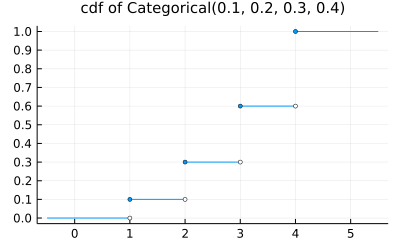

In [45]:
categ = Categorical(0.1, 0.2, 0.3, 0.4)
x = vcat([-0.5:0.02:0.98; NaN], ([k:0.02:k+0.98; NaN] for k in 1:3)..., 4:0.02:5.5)
plot(x, x -> cdf(categ, x); label="")
title!("cdf of Categorical(0.1, 0.2, 0.3, 0.4)")
plot!(xtick = -1:6, ytick = 0:0.1:1)
scatter!(1:4, x -> cdf(categ, x) ; label="", c=1, ms=3)
scatter!(1:4, x -> cdf(categ, x - 0.02) ; label="", c=:white, ms=3)

### 一様分布の累積分布函数

$a < b$ のとき, 一様分布 $\op{Uniform}(a, b)$ の確率密度函数は

$$
p(x) = \begin{cases}
1/(b-a) & (a < x < b) \\
0       & (\text{otherwise}) \\
\end{cases}
$$

である.  ゆえに, 一様分布 $\op{Uniform}(a, b)$ の累積分布函数は

$$
F(x) = \int_{-\infty}^x p(x')\,dx' =
\begin{cases}
0 & (x \le a) \\
(x-a)/(b-a) & (a \le x \le b) \\
1 & (b \le x) \\
\end{cases}
$$

になる.

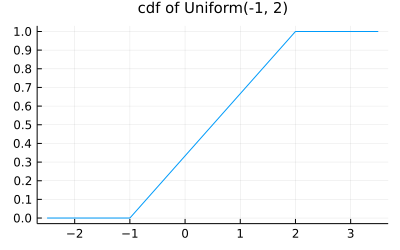

In [46]:
plot(x -> cdf(Uniform(-1, 2), x), -2.5, 3.5; label="")
title!("cdf of Uniform(-1, 2)")
yticks!(0:0.1:1)

### 標準正規分布の累積分布函数

誤差函数が

$$
\op{erf}(x) = \frac{2}{\sqrt{\pi}} \int_0^x \exp(-u^2) \,du
$$

と定義される.  この函数はコンピュータでの基本特殊函数ライブラリに含まれており, 効率的に計算可能である. この函数を使うと, 正規分布の累積分布函数は次のように書ける: $t = \sqrt{2}\,u$ とおくと,

$$
\begin{aligned}
F(z) &=
\frac{1}{\sqrt{2\pi}} \int_{-\infty}^z e^{-t^2/2}\,dt =
\frac{1}{2} + \frac{1}{\sqrt{2\pi}} \int_0^z e^{-t^2/2}\,dt
\\ & =
\frac{1}{2} + \frac{1}{\sqrt{\pi}} \int_0^{z/\sqrt{2}} e^{-u^2}\,du =
\frac{1}{2} + \frac{1}{2} \op{erf}\left(\frac{z}{\sqrt{2}}\right) =
\frac{1 + \op{erf}(z/\sqrt{2})}{2}.
\end{aligned}
$$

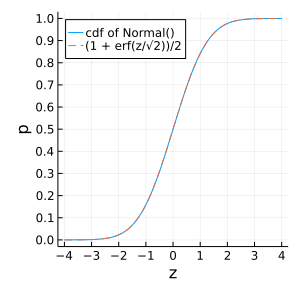

In [47]:
plot(z -> cdf(Normal(), z), -4, 4; label="cdf of Normal()", legend=:topleft)
plot!(z -> (1 + erf(z/√2))/2, -4, 4; label="(1 + erf(z/√2))/2", ls=:dash)
plot!(; xtick=-5:5, ytick = 0:0.1:1, xlabel="z", ylabel="p")
plot!(; size=(300, 300))

$y = \op{erf}(x)$ の逆函数 $x = \op{erfinv}(y)$ もコンピュータでの基本特殊函数ライブラリに含まれており, 効率的に計算可能である.  標準正規分布の累積分布函数 $p = F(z)$ の逆函数(分位点函数, quantile function)は

$$
z = Q_{\op{Normal}()}(p) = \sqrt{2}\,\op{erfinv}(2p - 1)
$$

と書ける.  標準正規分布の分位点函数は統計学で非常によく使われる.  例えば

$$
Q_{\op{Normal}()}(0.975) \approx 1.96
$$

は非常に有名な数値である. これは標準正規分布において値が $1.96$ 以上になる確率が $2.5\%$ になることを意味している.

In [48]:
quantile(Normal(), 0.975)

1.9599639845400576

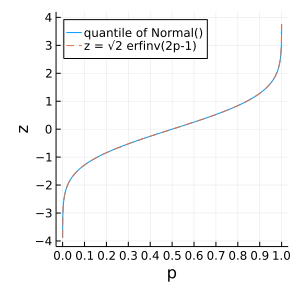

In [49]:
plot(p -> quantile(Normal(), p), 0, 1; label="quantile of Normal()", legend=:topleft)
plot!(p -> √2*erfinv(2p-1), 0, 1; label="z = √2 erfinv(2p-1)", ls=:dash)
plot!(; xtick = 0:0.1:1, ytick=-5:5, xlabel="p", ylabel="z", ylim=(-4.2, 4.2))
plot!(; size=(300, 300))

### 一様分布の期待値と分散

区間 $(a, b)$ 上の確率密度函数

$$
p(x) = \frac{1}{b - a} \quad (a < x < b)
$$

によって与えられる一様分布を考え, $X$ はこの分布に従う確率変数であるとする.

このとき, $X$ の期待値(平均) $\mu$ と分散 $\sigma^2$ は以下のように計算される:

$$
\begin{aligned}
&
\mu =
E[X] = \int_a^b x p(x)\,dx =
\frac{1}{b-a}\int_a^b x\,dx = \frac{b^2 - a^2}{2(b - a)} = \frac{a+b}{2}.
\\ &
E[X^2] = \int_a^b x^2 p(x)\,dx =
\frac{1}{b-a}\int_a^b x^2\,dx = \frac{b^3 - a^3}{3(b-a)} = \frac{a^2 + ab + b^2}{3}.
\\ &
\var(X) = E[X^2] - E[X]^2 = 
\frac{4(a^2+ab+b^2) - 3(a+b)^2}{12} =
\frac{a^2-2ab+b^2}{12} =
\frac{(b-a)^2}{12}.
\end{aligned}
$$

In [50]:
function E(f, dist::ContinuousUnivariateDistribution)
    quadgk(x -> f(x) * pdf(dist, x), extrema(dist)...)[1]
end

E (generic function with 2 methods)

In [51]:
mean(Uniform(0, 1//0)), var(Uniform(0, 1//1))

(1//0, 1//12)

In [52]:
E(x -> x, Uniform(0, 1)), E(x -> x^2, Uniform(0, 1)) - E(x -> x, Uniform(0, 1))^2

(0.5, 0.08333333333333331)

In [53]:
mean(Uniform(0, 5//1)), var(Uniform(0, 5//1))

(5//2, 25//12)

In [54]:
E(x -> x, Uniform(0, 5)), E(x -> x^2, Uniform(0, 5)) - E(x -> x, Uniform(0, 5))^2

(2.5, 2.0833333333333357)

### 標準正規分布の期待値と分散

$Z$ は標準正規分布に従う確率変数であるとする. このとき $Z$ は確率密度函数

$$
p(z) = \frac{1}{\sqrt{2\pi}}e^{-z^2/2}
$$

を持つ.  このとき, $z e^{-z^2/2}$ が奇函数であり, 奇函数の $\R$ 全体での積分は $0$ になるので,

$$
E[Z] = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^\infty x e^{-z^2/2}\,dz = 0.
$$

$z^2 e^{-z^2/2}$ が偶函数であることと, $z = x^{1/2}$ と変数変換すると, $dz = x^{-1/2}\,dx/2$ となることを使うと, 

$$
\begin{aligned}
\var(Z) &= E[Z^2] =
\frac{1}{\sqrt{2\pi}} \int_{-\infty}^\infty z^2 e^{-z^2/2}\,dz =
\frac{2}{\sqrt{2\pi}} \int_0^\infty z^2 e^{-z^2/2}\,dz
\\ &=
\frac{2}{\sqrt{2\pi}} \int_0^\infty x e^{-x/2} \frac{x^{-1/2}\,dx}{2} =
\frac{1}{\sqrt{2\pi}} \int_0^\infty x^{1/2 - 1} e^{-x/2}\,dx =
\frac{2^{1/2}\Gamma(1/2)}{\sqrt{2\pi}} = 1.
\end{aligned}
$$

ここで, 5番目の等号では次の公式を使った:

$$
\int_0^\infty x^{\alpha - 1} e^{-x/\theta}\,dx = \theta^\alpha \Gamma(\alpha) \quad (\alpha, \theta > 0).
$$

最後の等号では $\Gamma(1/2)=\sqrt{\pi}$ を使った. ガンマ函数はこれらの形で使われることが多い. これらの辺の公式については別のノートで解説することにする.

平均 $\mu$ と分散 $\sigma^2$ を持つ正規分布に従う確率変数 $X$ は $X = \mu + \sigma Z$ と作れる.

In [55]:
mean(Normal(0, 1//1)), var(Normal(0, 1//1))

(0//1, 1//1)

In [56]:
E(x -> x, Normal(0, 1)), E(x -> x^2, Normal(0, 1)) - E(x -> x, Normal(0, 1))^2

(4.2013717612707503e-16, 1.0)

In [57]:
mean(Normal(2, 3//1)), var(Normal(2, 3//1))

(2//1, 9//1)

In [58]:
E(x -> x, Normal(2, 3)), E(x -> x^2, Normal(2, 3)) - E(x -> x, Normal(2, 3))^2

(1.999999999999999, 9.0)

標準正規分布の歪度(わいど, skewness):

In [59]:
E(z -> z^3, Normal())

-5.974359421244178e-16

標準正規分布の尖度(せんど, kurtosis)に $3$ を足した値:

In [60]:
E(z -> z^4, Normal())

2.999999999999997

尖度の定義でどうして $3$ を足しておくか:

In [61]:
@syms t κ3 κ4 κ5 μ3 μ4 μ5
series(exp(t^2//2 + κ3 * t^3//6 + κ4 * t^4//24 + κ5 * t^5//120), t)

     2    3                                         
    t    t *κ3    4 /κ4   1\    5 /κ3    κ5\    / 6\
1 + -- + ----- + t *|-- + -| + t *|-- + ---| + O\t /
    2      6        \24   8/      \12   120/        

In [62]:
series(log(1 + t^2//2 + μ3 * t^3//6 + μ4 * t^4//24 + μ5 * t^5//120), t)

 2    3                                           
t    t *μ3    4 /μ4   1\    5 /  μ3    μ5\    / 6\
-- + ----- + t *|-- - -| + t *|- -- + ---| + O\t /
2      6        \24   8/      \  12   120/        

## 一様乱数の生成の繰り返しの分布

$0$ と $1$ のあいだにある $n$ 個の実数達 $t_1,\ldots,t_n$ の組 $(t_1,\ldots,t_n)$ に関する確率密度函数 $p(t_1,\ldots,t_n)$ を一様分布 $\op{Uniform}(0, 1)$ の確率密度函数

$$
p(t) = \begin{cases}
1 & (0 < t < 1) \\
0 & (\text{otherwise}) \\
\end{cases}
$$

の積で次のように定める: 

$$
p(t_1,\ldots,t_n) =
p(t_1)\cdots p(t_n) = \begin{cases}
1 & (0 < t_1,\ldots,t_n < 1) \\
0 & (\text{otherwise}) \\
\end{cases}
$$

これが実際に $n$ 変数の確率密度函数になっていることは次のように確認できる:

$$
\begin{aligned}
\int_{-\infty}^\infty\cdots\int_{-\infty}^\infty p(t_1,\ldots,t_n)\,dt_1\cdots dt_n &=
\int_{-\infty}^\infty\cdots\int_{-\infty}^\infty p(t_1)\cdots p(t_n)\,dt_1\cdots dt_n
\\ &=
\int_{-\infty}^\infty p(t_1)\,dt_1 \cdots \int_{-\infty}^\infty p(t_n)\,dt_n =
1\cdots 1 = 1.
\end{aligned}
$$

この確率密度函数 $p(t_1,\ldots,t_n)$ で定まる $\R^n$ 上の連続確率分布($n$ 変量の連続分布)を __一様乱数の生成の繰り返しの分布__ と呼ぶことにする.

この分布はコンピュータにおける一様乱数函数 `rand()` を $n$ 回実行して得られる長さ $n$ の $0$ から $1$ のあいだの乱数の列の分布のモデル化になっている.

この分布は後で別のノートで説明するように, 一様分布 $\op{Uniform}(0,1)$ のサイズ $n$ の __標本分布__ (sample distribution)もしくは各々が一様分布 $\op{Uniform}(0,1)$ に従う $n$ 個の __独立同分布確率変数達__ (independent and identically distributed random variables)が従う同時確率分布になっている.

$(T_1,\ldots,T_n)$ がこの分布に従う確率変数の組であるとき, その函数 $f(T_1,\ldots,T_n)$ の期待値は

$$
E[f(T_1,\ldots,T_n)] =
\int_{-\infty}^\infty\cdots\int_{-\infty}^\infty f(t_1,\ldots,t_n) p(t_1,\ldots,t_n)\,dt_1\cdots dt_n 
$$

と定義される. $f(T_1,\ldots,T_n)$ が $f(T_1,\ldots,T_n)=f_1(T_1)\ldots f_n(T_n)$ と各々の $T_i$ のみの函数の積になっている場合には

$$
\begin{aligned}
E[f_1(T_1)\cdots f_n(T_n)] &=
\int_{-\infty}^\infty\cdots\int_{-\infty}^\infty f_1(t_1)\cdots f_n(t_n) p(t_1)\cdots p(t_n)\,dt_1\cdots dt_n
\\ &=
\int_{-\infty}^\infty f_1(t_1)p(t_1)\,dt_1 \cdots \int_{-\infty}^\infty f_n(t_n)p(t_n)\,dt_n =
E[f_1(T_1)]\cdots E[f_n(T_n)]
\end{aligned}
$$

が成立する.  このように確率変数の積の期待値が各々の期待値の積に等しくなるとき, それらの確率変数は __独立__ (independent)であるという.  この点については後で別のノートで再度詳しく説明する.

以上のようなものは, $\op{Uniform}(0,1)$ に限らず, 任意の確率分布について考えることができる.

例えば, Bernoulli試行の確率分布はBernoulli分布の標本分布になっている.